# E-Commerce Shipping Data
### Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

## About Dataset

### Konteks
Perusahaan e-niaga internasional yang berbasis ingin menemukan wawasan utama dari basis data pelanggan mereka. Mereka ingin menggunakan beberapa teknik pembelajaran mesin tercanggih untuk mempelajari pelanggan mereka. Perusahaan menjual produk elektronik.

Sumber : https://www.kaggle.com/datasets/prachi13/customer-analytics?datasetId=1176727

### Isi
Dataset yang digunakan untuk pembuatan model berisi 10999 pengamatan dari 12 variabel.
Data berisi informasi berikut:

- ID : Nomor ID Pelanggan.
- Warehouse block : Perusahaan memiliki Gudang besar yang terbagi menjadi blok-blok seperti A,B,C,D,F.
- Mode of shipment :Perusahaan mengirimkan produk dengan berbagai cara seperti Kapal, Penerbangan, dan Jalan.
- Customer care calls : Jumlah panggilan yang dilakukan dari penyelidikan untuk penyelidikan kiriman.
- Customer rating : Perusahaan telah menilai dari setiap pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).
- Cost of the product : Biaya Produk dalam Dolar AS.
- Prior purchases : Jumlah Pembelian Sebelumnya.
- Product importance : Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti rendah, sedang, tinggi.
- Gender : Pria dan Wanita.
- Discount offered : Diskon yang ditawarkan untuk produk tertentu itu.
- Weight in gms : Ini adalah berat dalam gram.
- Reached on time : Ini adalah variabel target, di mana 1 Menunjukkan bahwa produk TIDAK tercapai tepat waktu dan 0 menunjukkan telah tercapai tepat waktu.

### Tujuan Project
- Memprediksi tingkat pengiriman produk disampaikan tepat waktu atau tidak
- Menentukan penyebab keterlambatan produk
- Membuat rekomendasi untuk meminimalisir keterlambatan pengiriman produk

### Model Machine Learning 
Pemodelan yang akan digunakan bertujuan untuk memprediksi pengiriman produk disampaikan tepat waktu atau tidak tepat waktu. Target Variabel yang akan digunakan adalah `Reached.on.Time_Y.N`. Untuk mengurangi kesalahan prediksi (False Positive) dan (False Negative), maka pilih nilai Recall yang tinggi atau presisi yang tinggi. Classification Task :

- False Positive: Diprediksi pengiriman produk disampaikan tepat waktu, ternyata tidak tepat waktu

- False Negative: Diprediksi pengiriman produk disampaikan tidak tepat waktu, ternyata tepat waktu

Model Machine Learning yang akan diuji antara lain:

- Logical Regression
- K-NN
- Decision Tree Classification
- Random Forest Classification

## Data Preparation

### Import Libraries

In [304]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as metrics
import scikitplot as skplt

### Import Dataset

In [305]:
df = pd.read_csv('Train.csv')

In [306]:
df.head(5)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

**Observasi** :

1. Semua kolom, kecuali kolom `Warehouse_block`, `Mode_of_Shipment`, `Product_importance`, dan `Gender` adalah kategorik
2. Kolom `Reached.on.Time_Y.N` adalah biner (0,1)
3. Tidak ada cacat yang jelas pada data (nama kolom vs entrinya), semuanya terlihat bagus

### Data Preprocessing

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Observasi** :

1. Data berisi 12 kolom dengan 10999 baris
2. Semua dtype pada data terlihat sesuai

## Data Cleaning

### Check Null and Missing Values

In [308]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [309]:
df_null = df.isnull().sum().reset_index()
df_null.columns = ['feature','missing_value']
df_null['percentage'] = round((df_null['missing_value']/len(df))*100,3)
df_null = df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
df_null = df_null[df_null['percentage']>0]
df_null

Empty DataFrame
Columns: [feature, missing_value, percentage]
Index: []

Data tidak terdapat missing value

### Duplicated Data Check

In [310]:
df.duplicated().sum()

0

Tidak ada duplikat data

Pada kolom `Reached.on.Time_Y.N` dikirim tepat waktu 1 menunjukkan "TIDAK", dan 0 adalah "YA" sehingga membuat bingung. Jadi, ubah 0 menjadi "TIDAK" dan 1 menjadi "YA".

In [311]:
df_change = df.copy()
df_change["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)

In [312]:
#Drop ID
df_drop = df_change.copy()
df_drop.drop(['ID'],axis = 1,inplace = True)
df_drop.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    0  
1                59           3088                    0  
2                48           3374                    0  
3                10           1177                    0  
4                46           2484                    0

## Exploratory Data Analysis

In [180]:
# Cek perbandingan target
target = df_drop['Reached.on.Time_Y.N'].value_counts(normalize=True)

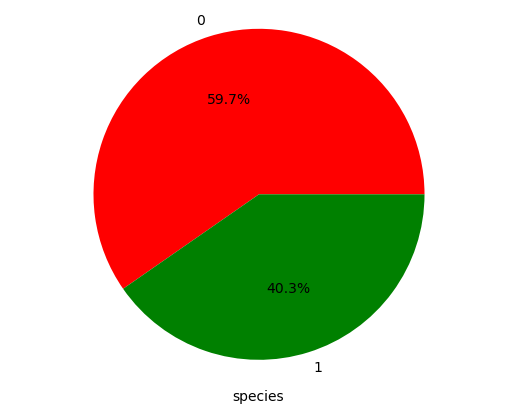

In [181]:
species = target.index
count = target.values
colors= ['red','green']

plt.pie(count, labels=species,
        colors=colors, 
        autopct='%1.1f%%')
plt.xlabel('species')
plt.axis('equal')
plt.show()

**Observasi** :

1. 59.7% menunjukkan bawah tidak tercapai tepat waktu
2. 40.3% menunjukkan telah tercapai tepat waktu

## Descriptive Statistic
### Statistical summary

In [182]:
#numericals columns
num_col = list(df_drop._get_numeric_data().columns)
print(num_col)

['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [183]:
#categoricals columns
cat_col = [i for i in df_drop.columns if i not in num_col]
print(cat_col)

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [184]:
# numerical statistical sumary
df_drop[num_col].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.403309  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             0.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

**Observasi** :

1. Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
2. Kolom `Reached.on.Time_Y.N` adalah kolom boolean/biner karena nilainya 0 atau 1, tidak perlu menyimpulkan simmetrisitasnya
3. Rata-rata != 50% (Median) pada kolom `Cost_of_the_Product`, `Prior_purchases`, `Discount_offered`, dan `Weight_in_gms` menunjukkan skewed distribution
4. Rata-rata ~ Median pada kolom `Customer_care_calls` dan `Customer_rating` menunjukan symmetric distribution

In [185]:
# describe method on categorical data
df_drop[cat_col].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [186]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in cat_col:
  print(f"Value counts of {col} column")
  print(df_drop[col].value_counts(), '\n')

Value counts of Warehouse_block column
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64 

Value counts of Mode_of_Shipment column
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64 

Value counts of Product_importance column
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64 

Value counts of Gender column
F    5545
M    5454
Name: Gender, dtype: int64 



**Observasi** :

- Pada kolom `Warehouse_block` terdapat 5 blok (A, B, C, D, F) dimana blok F adalah yang terbanyak (3666 baris)
- Pada kolom `Mode_of_Shipment ` terdapat 3 macam cara pengiriman (Ship, Flight, dan Road) dimana Ship adalah cara pengiriman yang terbanyak (7462 baris)
- Pada kolom `Product_importance` terdapat 3 macam kepentingan produk (low, medium, high) dimana low adalah yang paling banyak (5297 baris)
- Pada kolom `Gender` terdapat F (Female) dan M (Male), female sedikit lebih banyak daripada male (5545 baris)

# Univariate Analysis

## Boxplot to detect outliers

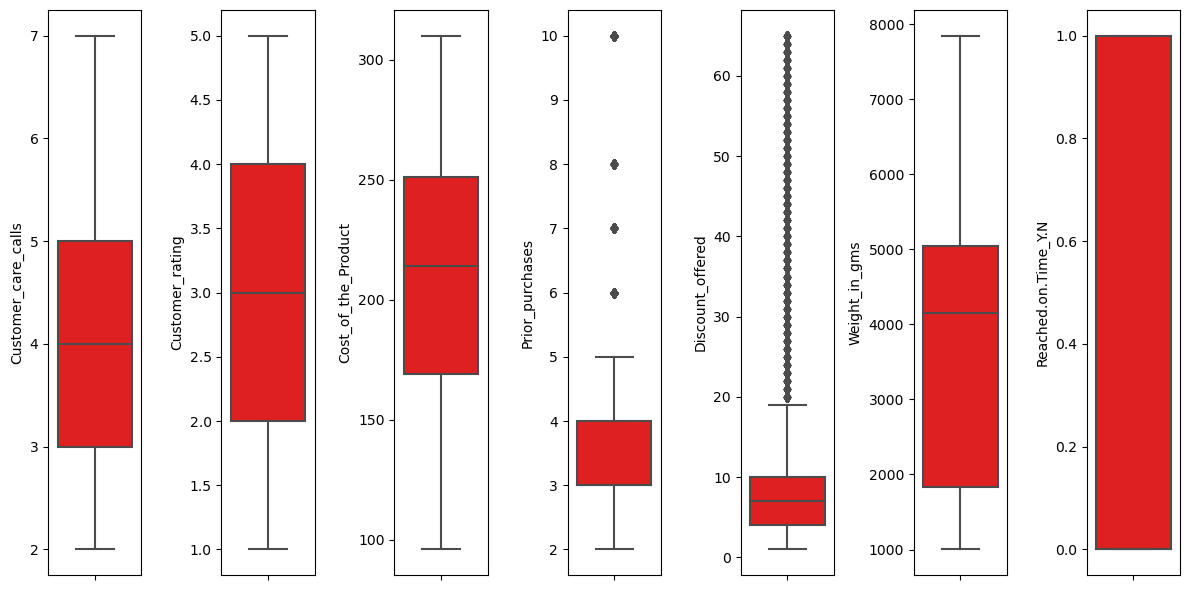

In [187]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = num_col
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_drop[features[i]], color='red')
    plt.tight_layout()

In [188]:
def check_outlier(data, column):
    q1 = df_drop[column].quantile(0.25)
    q3 = df_drop[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in df_drop[column].values]

In [189]:
df_outlier = df_drop.copy()
df_outlier['outlier_Prior_purchases'] = check_outlier(data=df_outlier, column='Prior_purchases')
df_outlier[df_outlier['outlier_Prior_purchases'] == 'outlier']

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
37                  F             Ship                    2                4   
62                  A             Ship                    5                1   
74                  A             Ship                    6                1   
90                  D             Ship                    5                3   
133                 F           Flight                    5                4   
180                 D             Ship                    4                1   
182                 A             Ship                    3                2   
183                 B             Ship                    3                5   
226                 C             Ship                    4                3   
228                 D             Ship                    3                2   
229                 F             Ship                    3                3   
274                 C           Flight                    3                5   
314                 A             Ship                    4                2   
339                 B             Ship                    4                4   
343                 F             Ship                    2                5   
453                 B             Ship                    4                1   
457                 F             Ship                    3                4   
461                 F             Ship                    3                4   
462                 D             Ship                    3                4   
463                 F             Ship                    4                2   
464                 A             Ship                    5                2   
474                 D             Ship                    4                3   
478                 C             Ship                    3                4   
482                 A             Ship                    3                3   
483                 B             Ship                    3                2   
484                 C             Ship                    4                3   
485                 F             Ship                    5                5   
538                 C             Road                    3                3   
561                 B           Flight                    2                5   
573                 B             Ship                    4                3   
588                 D             Ship                    3                1   
637                 F             Ship                    3                3   
693                 B           Flight                    3                3   
701                 F           Flight                    4                2   
702                 D             Ship                    3                4   
704                 A             Ship                    5                1   
725                 F             Ship                    3                4   
733                 F             Ship                    4                4   
734                 A             Ship                    3                4   
736                 C             Ship                    5                3   
754                 C             Ship                    3                5   
758                 A             Ship                    2                5   
807                 B             Road                    2                4   
833                 F           Flight                    3                4   
839                 F             Ship                    5                2   
860                 A             Ship                    5                3   
880                 C             Ship                    2                4   
900                 D             Ship                    5                5   
909                 B             Ship                    4                5   
910   

In [190]:
df_outlier['outlier_Discount_offered'] = check_outlier(data=df_outlier, column='Discount_offered')
df_outlier[df_outlier['outlier_Discount_offered'] == 'outlier']

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                  D           Flight                    4                2   
1                  F           Flight                    4                5   
2                  A           Flight                    2                2   
4                  C           Flight                    2                2   
7                  F           Flight                    4                1   
9                  B           Flight                    3                2   
11                 F           Flight                    4                5   
13                 F           Flight                    4                4   
14                 A           Flight                    4                3   
15                 B           Flight                    4                3   
17                 F             Ship                    5                5   
19                 F             Ship                    4                5   
20                 A             Ship                    3                3   
21                 B             Ship                    3                1   
24                 D             Ship                    4                5   
25                 F             Ship                    3                1   
26                 A             Ship                    4                1   
27                 B             Ship                    5                1   
28                 C             Ship                    2                3   
29                 F             Ship                    5                4   
30                 D             Ship                    3                4   
31                 F             Ship                    5                3   
32                 A             Ship                    3                1   
34                 C             Ship                    4                2   
35                 F             Ship                    5                4   
36                 D             Ship                    3                5   
38                 A             Ship                    5                1   
39                 B             Ship                    4                2   
41                 F             Ship                    5                5   
42                 D             Ship                    3                5   
43                 F             Ship                    3                1   
44                 A             Ship                    3                1   
46                 C             Ship                    3                4   
47                 F             Ship                    5                1   
49                 F             Ship                    5                3   
50                 A             Ship                    4                1   
51                 B             Ship                    4                4   
52                 C             Ship                    4                3   
53                 F             Ship                    2                1   
55                 F             Ship                    2                5   
56                 A             Ship                    3                3   
57                 B             Ship                    3                3   
58                 C             Ship                    5                5   
60                 D             Ship                    3                1   
61                 F             Ship                    3                3   
62                 A             Ship                    5                1   
63                 B             Ship                    3                1   
64                 C             Ship                    4                5   
65                 F             Ship                    3                2   
69                 B             Ship                  

**Observasi**:

- Pada kolom `Prior_purchases` terdapat outliers jumlah penjualan sebelumnya dengan nilai masih tergolong wajar dan memang benar adanya. Maka, outliers tidak perlu didrop.
- Pada kolom `Discount_offered` terdapat outliers diskon yang ditawarkan untuk produk tertentu dengan nilai masih tergolong wajar dan memang benar adanya. Maka, outliers tidak perlu didrop.

# KDE plot for knowing the distribution form

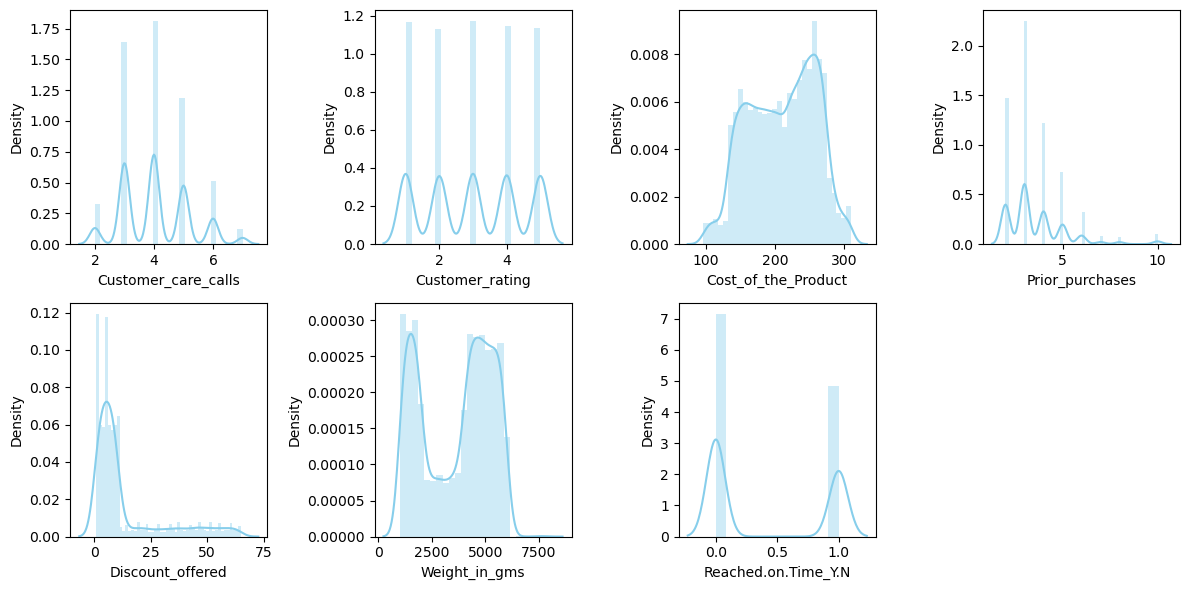

In [191]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = num_col
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_drop[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observasi**:

- Dalam hal variabel target, `Reached.on.Time_Y.N` = 0 lebih sering muncul di dataset
- Pada kolom `Cost_of_the_Product` agak simetris
- Pada kolom `Discount_offered` bentuk grafik tidak simetris (positively skewed)
- Pada kolom `Weight_in_gms` memiliki distribusi bimodal. Itu dipengaruhi oleh 2 mode / puncak yang tidak seimbang. Ini juga menunjukkan ada 2 jenis Berat yang berbeda
- Abaikan kolom interpretasi fitur dengan nilai diskrit terbatas pada kolom `Customer_care_calls`, `Customer_rating` dan `Prior_purchases`

# Multivariate analysis

<AxesSubplot:>

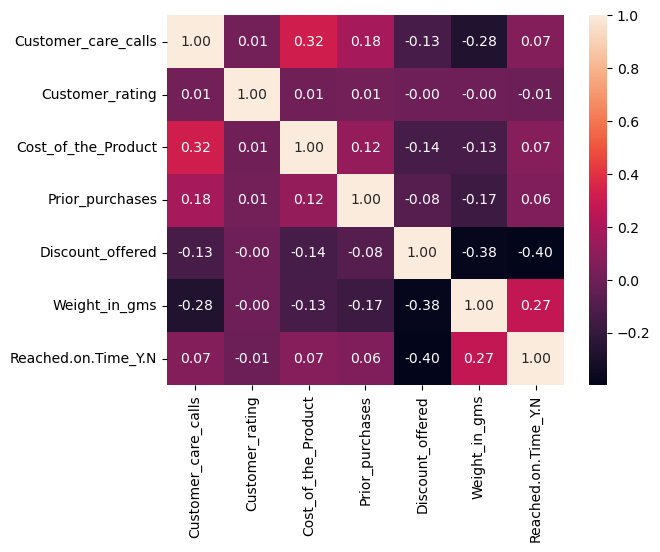

In [192]:
# correlation heatmap
correlation = df_drop.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Tidak ada fitur yang berkorelasi kuat

# Deep Dive Question

1. Cara pengiriman apa yang paling banyak menyebabkan pengiriman produk tidak tepat waktu?

Text(0, 0.5, 'percentage')

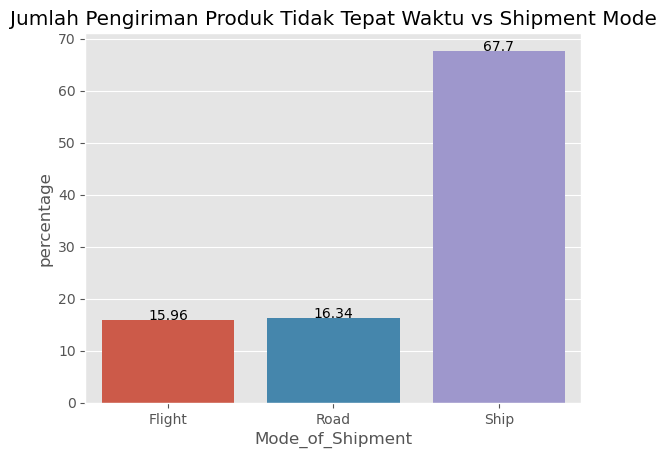

In [316]:
df_not = df[df['Reached.on.Time_Y.N']==0]
df_no1 = pd.DataFrame((df_not.groupby(['Mode_of_Shipment'])['ID'].count())/len(df_not)*100)
df_no1 = df_no1.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=df_no1 )
for index, row in df_no1.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Jumlah Pengiriman Produk Tidak Tepat Waktu vs Shipment Mode')
plt.ylabel('percentage')

**Observasi**:

Sekitar 68% keterlambatan pengiriman disebabkan karena Ship (kapal) digunakan sebagai layanan pengiriman. Maka, opsi alternatif seperti layanan Flight (Penerbangan) dan Road (Jalan) dapat dipertimbangkan untuk mengurangi keterlambatan pengiriman.

2. Blok gudang apa yang menyebabkan pengiriman produk tidak tepat waktu?

Text(0, 0.5, 'percentage')

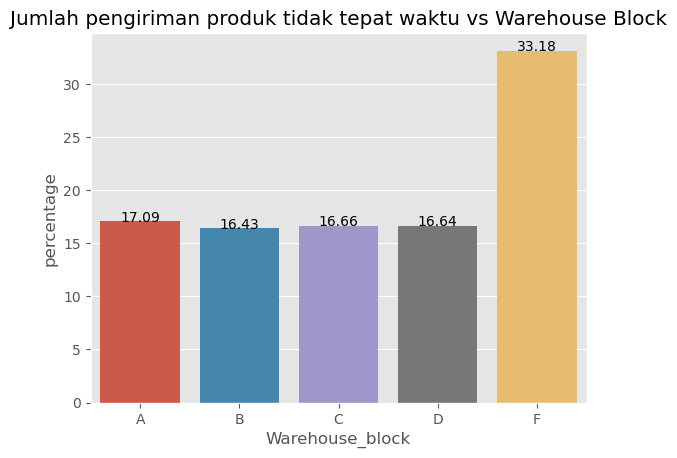

In [317]:
df_no2 = pd.DataFrame((df_not.groupby(['Warehouse_block'])['ID'].count())/len(df_not)*100)
df_no2 = df_no2.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=df_no2)
for index, row in df_no2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Jumlah pengiriman produk tidak tepat waktu vs Warehouse Block')
plt.ylabel('percentage')

**Observasi**:

Gudang blok F dengan persentase tertinggi yaitu 33.18% menyebabkan pengiriman tertunda. Untuk sisa blok, persentase pengiriman tertunda hampir konsisten.

3. Rating berapakah yang paling banyak diberikan akibat pengiriman tidak tepat waktu?

Text(0, 0.5, 'percentage')

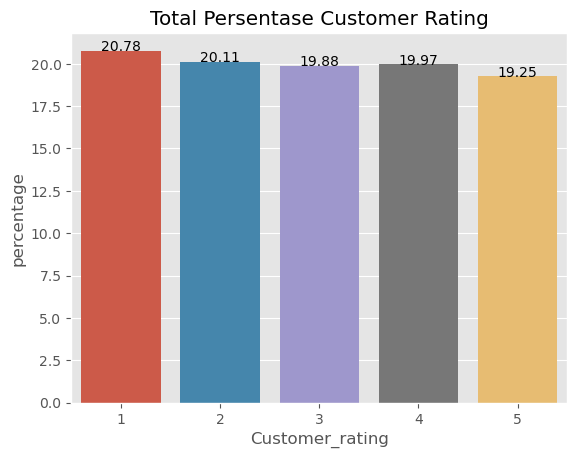

In [318]:
df_no3 = pd.DataFrame((df_not.groupby(['Customer_rating'])['ID'].count())/len(df_not)*100)
df_no3 = df_no3.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=df_no3 )
for index, row in df_no3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total Persentase Customer Rating')
plt.ylabel('percentage')

Persentase rating berbeda yang diberikan oleh pelanggan tampaknya sama. Tetapi rating 5 memiliki persentase terkecil yaitu 19.25% dari total pengiriman menerima 5 rating.

4. Barang seperti apa yang paling banyak mengalami pengiriman tidak tepat waktu?

Text(0, 0.5, 'percentage')

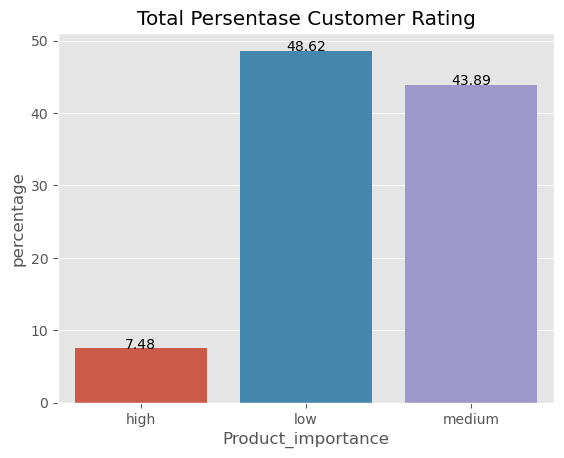

In [319]:
df_no4 = pd.DataFrame((df_not.groupby(['Product_importance'])['ID'].count())/len(df_not)*100)
df_no4 = df_no4.reset_index()
visual=sns.barplot(x="Product_importance", y="ID", data=df_no4 )
for index, row in df_no4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total Persentase Customer Rating')
plt.ylabel('percentage')

**Observasi**:

Jumlah pengiriman yang lebih banyak adalah kepentingan produk yang rendah yaitu 48.62%. Jumlah produk sangat penting yang dikirimkan sangat sedikit yaitu 7.48%. Ini berarti lebih banyak produk dengan kepentingan rendah yang dikirim tidak tepat waktu.

5. Gender mana yang paling banyak melakukan pemesanan?

Text(0.5, 1.0, 'Gender dengan Reached on Time or Not')

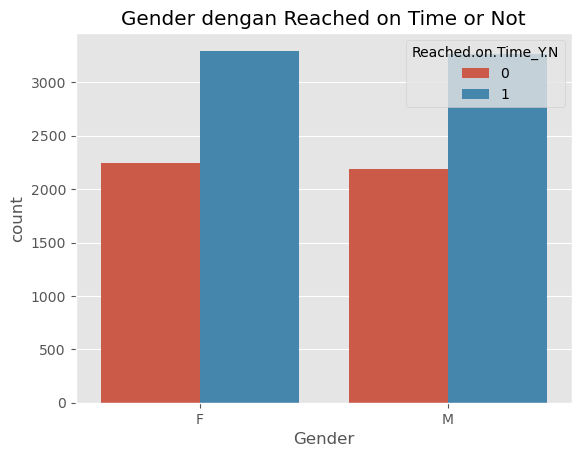

In [320]:
sns.countplot(x = "Gender", data = df, hue="Reached.on.Time_Y.N")
plt.title("Gender dengan Reached on Time or Not")

**Observasi**:

Jumlah pemesan dengan gender wanita maupun laki-laki hampir sama.

6. Apakah diskon di atas 10% bisa meningkatkan rating?

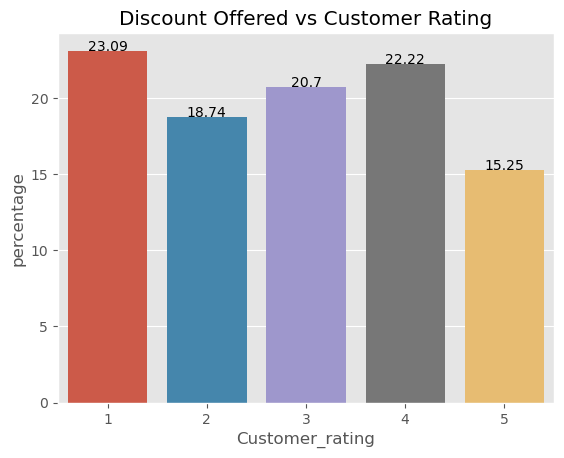

In [315]:
df_nott = df.loc[(df['Discount_offered'] >= 10) & (df['Reached.on.Time_Y.N'] == 0)]
df_no6 = pd.DataFrame((df_nott.groupby(['Customer_rating'])['ID'].count())/len(df_nott)*100)
df_no6 = df_no6.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=df_no6 )
for index, row in df_no6.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Discount Offered vs Customer Rating')
plt.ylabel('percentage')
plt.show()

**Observasi**:

Dari hasil di atas, menunjukan bahwa diskon besar tidak akan membantu meningkatkan rating dengan pengiriman produk tidak tepat waktu.

# Categorical Column Transformation

In [199]:
df_drop.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    0  
1                59           3088                    0  
2                48           3374                    0  
3                10           1177                    0  
4                46           2484                    0

1. One Hot Encoding (OHE) : Gender

2. Frequency Encoding : Warehouse_block, Mode_of_Shipment, Product_importance

In [200]:
### Onehot Encoding
onehot_columns = ['Gender']
df_drop = pd.get_dummies(df_drop, columns = onehot_columns)

In [201]:
### Frequency Encoding

####  Warehouse_block 
freq_Warehouse_block = df_drop['Warehouse_block'].value_counts().reset_index()
freq_Warehouse_block.rename(columns={"index": "Warehouse_block", "Warehouse_block": "freq_Warehouse_block"}, inplace = True)
freq_Warehouse_block['percent_Warehouse_block'] = round((freq_Warehouse_block['freq_Warehouse_block']/freq_Warehouse_block['freq_Warehouse_block'].sum())*100,2)
freq_Warehouse_block

Warehouse_block  freq_Warehouse_block  percent_Warehouse_block
0               F                  3666                    33.33
1               D                  1834                    16.67
2               A                  1833                    16.67
3               B                  1833                    16.67
4               C                  1833                    16.67

In [202]:
df_drop = df_drop.merge(freq_Warehouse_block[['Warehouse_block','percent_Warehouse_block']], on='Warehouse_block', how='inner')

In [203]:
#### Mode_of_Shipment 
freq_Mode_of_Shipment = df_drop['Mode_of_Shipment'].value_counts().reset_index()
freq_Mode_of_Shipment.rename(columns={"index": "Mode_of_Shipment", "Mode_of_Shipment": "freq_Mode_of_Shipment"}, inplace = True)
freq_Mode_of_Shipment['percent_Mode_of_Shipment'] = round((freq_Mode_of_Shipment['freq_Mode_of_Shipment']/freq_Mode_of_Shipment['freq_Mode_of_Shipment'].sum())*100,2)
freq_Mode_of_Shipment

Mode_of_Shipment  freq_Mode_of_Shipment  percent_Mode_of_Shipment
0             Ship                   7462                     67.84
1           Flight                   1777                     16.16
2             Road                   1760                     16.00

In [204]:
df_drop = df_drop.merge(freq_Mode_of_Shipment[['Mode_of_Shipment','percent_Mode_of_Shipment']], on='Mode_of_Shipment', how='inner')

In [205]:
#### Product_importance 
freq_Product_importance = df_drop['Product_importance'].value_counts().reset_index()
freq_Product_importance.rename(columns={"index": "Product_importance", "Product_importance": "freq_Product_importance"}, inplace = True)
freq_Product_importance['percent_Product_importance'] = round((freq_Product_importance['freq_Product_importance']/freq_Product_importance['freq_Product_importance'].sum())*100,2)
freq_Product_importance

Product_importance  freq_Product_importance  percent_Product_importance
0                low                     5297                       48.16
1             medium                     4754                       43.22
2               high                      948                        8.62

In [206]:
df_drop = df_drop.merge(freq_Product_importance[['Product_importance','percent_Product_importance']], on='Product_importance', how='inner')

In [207]:
#drop
df_drop = df_drop.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], axis=1)

In [208]:
df_drop.head()

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    3                4                  250                3   
2                    5                2                  247                3   
3                    4                1                  207                5   
4                    4                2                  136                3   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Gender_F  Gender_M  \
0                44           1233                    0         1         0   
1                 3           2371                    0         1         0   
2                17           3889                    0         0         1   
3                48           2399                    0         0         1   
4                65           1962                    0         1         0   

   percent_Warehouse_block  percent_Mode_of_Shipment  \
0                    16.67                     16.16   
1                    16.67                     16.16   
2                    16.67                     16.16   
3                    16.67                     16.16   
4                    16.67                     16.16   

   percent_Product_importance  
0                       48.16  
1                       48.16  
2                       48.16  
3                       48.16  
4                       48.16

In [209]:
df_drop.dtypes

Customer_care_calls             int64
Customer_rating                 int64
Cost_of_the_Product             int64
Prior_purchases                 int64
Discount_offered                int64
Weight_in_gms                   int64
Reached.on.Time_Y.N             int64
Gender_F                        uint8
Gender_M                        uint8
percent_Warehouse_block       float64
percent_Mode_of_Shipment      float64
percent_Product_importance    float64
dtype: object

In [210]:
df_drop['Reached.on.Time_Y.N'].value_counts()

0    6563
1    4436
Name: Reached.on.Time_Y.N, dtype: int64

Terlihat bahwa data imbalanced pada kolom target variablenya.

# Dataset Splitting

In [211]:
train, test = train_test_split(df,test_size = 0.25, random_state = 1) 

In [212]:
x_train = train.loc[:, train.columns!='Reached.on.Time_Y.N']
y_train = train['Reached.on.Time_Y.N']

x_test = test.loc[:, test.columns!='Reached.on.Time_Y.N']
y_test = test['Reached.on.Time_Y.N']

In [213]:
df_train, df_test = train_test_split(df_drop, 
                                     test_size = 0.25, random_state = 1) 

In [214]:
X_train_data = df_train.loc[:, df_train.columns!='Reached.on.Time_Y.N']
y_train_data = df_train['Reached.on.Time_Y.N']

X_test_data = df_test.loc[:, df_test.columns!='Reached.on.Time_Y.N']
y_test_data = df_test['Reached.on.Time_Y.N']

In [215]:
y_train_data.head()

1169     1
3027     0
7635     1
7267     0
10193    0
Name: Reached.on.Time_Y.N, dtype: int64

In [216]:
y_test_data.head()

7030    1
2095    1
7168    1
7969    1
6320    1
Name: Reached.on.Time_Y.N, dtype: int64

In [217]:
df_drop['Reached.on.Time_Y.N'].value_counts()

0    6563
1    4436
Name: Reached.on.Time_Y.N, dtype: int64

# Dealing With Imbalanced Data

In [218]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under))

Counter({0: 4963, 1: 3286})
Counter({0: 3286, 1: 3286})


# Evaluation Function

In [219]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test_data, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO-On Time', 'On Time'],va='center')
    plt.xticks([0.5,1.5], [ 'NO-On Time', 'On Time'],va='center')
    plt.show()

In [220]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

# K-Nearest Neighbor

In [221]:
#Baseline
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_under, y_train_under) #KNN sedang melakukan proses belajar

KNeighborsClassifier()

In [222]:
evaluate(knn)

Accuracy: 0.6610909090909091
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1600
           1       0.57      0.76      0.65      1150

    accuracy                           0.66      2750
   macro avg       0.67      0.68      0.66      2750
weighted avg       0.69      0.66      0.66      2750

------
Assuming 1 as positive, we get:

True Positive: 875
True Negative: 943
False Positive: 657
False Negative: 275

Precision: 0.5711488250652742
Recall: 0.7608695652173914
F1-Score: 0.6524981357196123


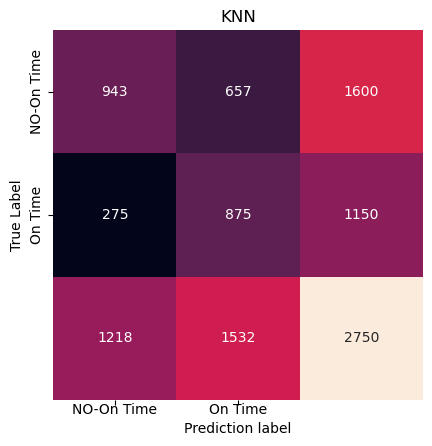

In [223]:
model_evaluation(knn.predict(X_test_data),"KNN")

Recall sudah bagus, tetapi bukan Recall fokus kita. FN bisa ditolerir, tetapi FP jangan sampai terjadi karena besar. 

Penyetelan pada nilai n_neighbors untuk mendapatkan nilai Precision yang terbaik. Akan dicoba nilai n_neighbors dari 3,5,7,9,11,13,15 dan akan dipilih n_neighbors yang memiliki nilai Precision terbaik.

In [224]:
def evaluate_model(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return precision

In [246]:
dictionary = {
    'n':[],
    'precision':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_under, y_train_under)
    precision = evaluate_model(knn)
    dictionary['n'].append(n)
    dictionary['precision'].append(precision)
    
df_prec = pd.DataFrame(dictionary)

In [247]:
df_prec.sort_values(['precision'], ascending = False)

n  precision
1   5   0.579292
6  15   0.573770
2   7   0.573209
3   9   0.570397
5  13   0.570196
0   3   0.569106
4  11   0.568824

Dari hasil training beberapa nilai n_neighbors pada model K-Nearest Neighbors, dapat disimpulkan bahwa n_neighbors terbaik untuk mendapatkan nilai Precision tertinggi adalah 5

In [248]:
## Testing Model (n_neighbors = 5)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_under, y_train_under)

KNeighborsClassifier()

In [249]:
evaluate(knn)

Accuracy: 0.6698181818181819
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1600
           1       0.58      0.77      0.66      1150

    accuracy                           0.67      2750
   macro avg       0.68      0.68      0.67      2750
weighted avg       0.70      0.67      0.67      2750

------
Assuming 1 as positive, we get:

True Positive: 884
True Negative: 958
False Positive: 642
False Negative: 266

Precision: 0.5792922673656619
Recall: 0.768695652173913
F1-Score: 0.6606875934230193


# Logistic Regression

In [229]:
logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)

LogisticRegression()

In [230]:
evaluate(logreg)

Accuracy: 0.6563636363636364
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.84      0.51      0.63      1600
           1       0.56      0.87      0.68      1150

    accuracy                           0.66      2750
   macro avg       0.70      0.69      0.65      2750
weighted avg       0.72      0.66      0.65      2750

------
Assuming 1 as positive, we get:

True Positive: 997
True Negative: 808
False Positive: 792
False Negative: 153

Precision: 0.5572945779765232
Recall: 0.8669565217391304
F1-Score: 0.6784620619258251


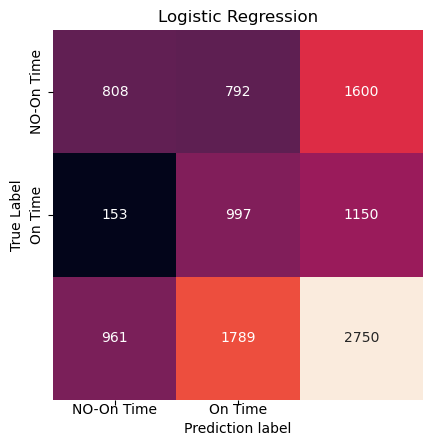

In [231]:
model_evaluation(logreg.predict(X_test_data),"Logistic Regression")

# Decision Tree

In [232]:
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.652
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1600
           1       0.58      0.64      0.61      1150

    accuracy                           0.65      2750
   macro avg       0.65      0.65      0.65      2750
weighted avg       0.66      0.65      0.65      2750

------
Assuming 1 as positive, we get:

True Positive: 733
True Negative: 1060
False Positive: 540
False Negative: 417

Precision: 0.5758051846032993
Recall: 0.6373913043478261
F1-Score: 0.6050350804787454


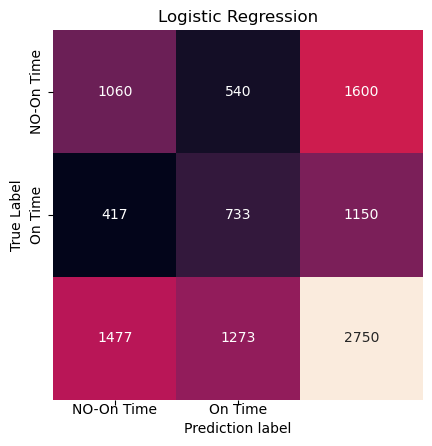

In [233]:
model_evaluation(dt.predict(X_test_data),"Logistic Regression")

# Random Forest

In [234]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    

In [235]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(X_train_data, y_train_data)
evaluate(base_model)

Accuracy: 0.6610909090909091
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1600
           1       0.58      0.68      0.63      1150

    accuracy                           0.66      2750
   macro avg       0.66      0.66      0.66      2750
weighted avg       0.67      0.66      0.66      2750

------
Assuming 1 as positive, we get:

True Positive: 786
True Negative: 1032
False Positive: 568
False Negative: 364

Precision: 0.5805022156573116
Recall: 0.6834782608695652
F1-Score: 0.6277955271565495


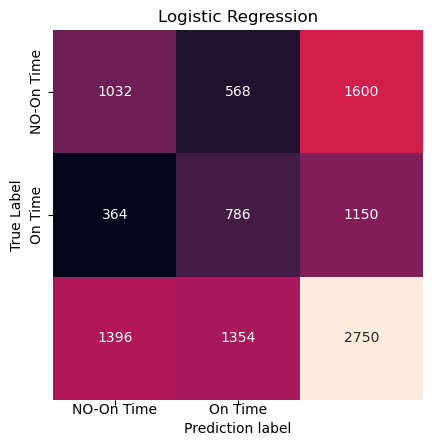

In [236]:
model_evaluation(base_model.predict(X_test_data),"Logistic Regression")

# Undersampling

In [237]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under))

Counter({0: 4963, 1: 3286})
Counter({0: 3286, 1: 3286})


In [238]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(X_train_under, y_train_under)
evaluate(under_model, X_test_data, y_test_data)

Accuracy: 0.6810909090909091
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.86      0.54      0.66      1600
           1       0.58      0.88      0.70      1150

    accuracy                           0.68      2750
   macro avg       0.72      0.71      0.68      2750
weighted avg       0.74      0.68      0.68      2750

------
Assuming 1 as positive, we get:

True Positive: 1016
True Negative: 857
False Positive: 743
False Negative: 134

Precision: 0.5776009096077317
Recall: 0.8834782608695653
F1-Score: 0.6985218288071502


Random Forest Undersampling memiliki nilai Precision paling mentok 0.55, tidak masalah karena terbantu dengan nilai Recall dan F1-Score yang tinggi. Pengembangannya memperbaiki presisinya. 


Karena fokusnya ke pengiriman, Recall bisa dijadikan pertimbangan. Karena sebenarnya Recall dan Presisi bisa dijadikan pertimbangan. Dimana Recallnya itu merupakan prediksi negatif (tidak tepat waktu) tapi faktanya tepat waktu. Dari model ini, TP bernilai besar pengaruh dari FN yang kecil maka Recallnya besar.

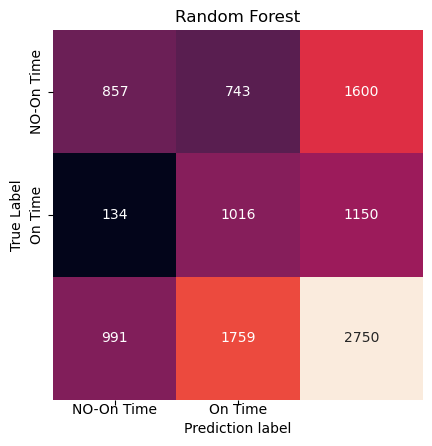

In [239]:
model_evaluation(under_model.predict(X_test_data),"Random Forest")

# Oversampling

In [240]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 4963, 1: 3286})
Counter({1: 4963, 0: 4963})


In [241]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, X_test_data, y_test_data)

Accuracy: 0.6552727272727272
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1600
           1       0.57      0.70      0.63      1150

    accuracy                           0.66      2750
   macro avg       0.66      0.66      0.65      2750
weighted avg       0.67      0.66      0.66      2750

------
Assuming 1 as positive, we get:

True Positive: 800
True Negative: 1002
False Positive: 598
False Negative: 350

Precision: 0.5722460658082976
Recall: 0.6956521739130435
F1-Score: 0.6279434850863422


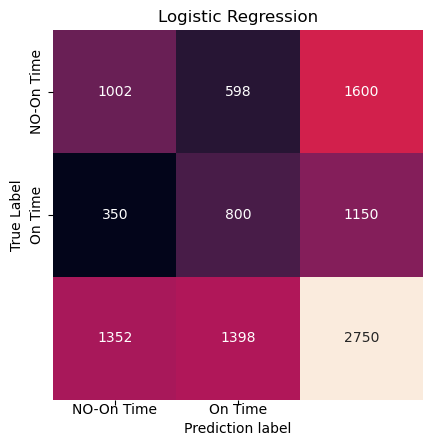

In [242]:
model_evaluation(over_model.predict(X_test_data),"Logistic Regression")

# Combining Oversampling and Undersampling

In [245]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_data, y_train_data)
evaluate(pipeline, X_test_data, y_test_data)

Accuracy: 0.6818181818181818
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1600
           1       0.59      0.79      0.68      1150

    accuracy                           0.68      2750
   macro avg       0.69      0.70      0.68      2750
weighted avg       0.71      0.68      0.68      2750

------
Assuming 1 as positive, we get:

True Positive: 909
True Negative: 966
False Positive: 634
False Negative: 241

Precision: 0.5891121192482177
Recall: 0.7904347826086957
F1-Score: 0.6750835499443


# Finding Best Coefficient of Oversampling and Undersampling

In [244]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(X_train_data, y_train_data)
            y_pred = pipeline.predict(X_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.13s/it]


In [160]:
df_result = pd.DataFrame(result)
df_result.sort_values(['prec'], ascending=False)

over_coef  under_coef       acc      prec    recall        f1
1        0.7         0.8  0.679273  0.587696  0.780870  0.670650
7        0.9         0.9  0.670545  0.586771  0.717391  0.645540
6        0.8         1.0  0.682545  0.585231  0.826957  0.685405
0        0.7         0.7  0.664364  0.584012  0.686087  0.630948
5        0.8         0.9  0.671273  0.580183  0.773913  0.663189
4        0.8         0.8  0.661455  0.579752  0.692174  0.630995
2        0.7         0.9  0.676727  0.579139  0.830435  0.682387
9        1.0         1.0  0.662545  0.578501  0.711304  0.638066
8        0.9         1.0  0.667273  0.576547  0.769565  0.659218
3        0.7         1.0  0.676000  0.575160  0.861739  0.689871

## G - Mean Threshold

In [253]:
rf_pred_proba = under_model.predict_proba(X_test_data)
#secara default ML jika menggunakan predict_proba sifatnya ialah :
# nilai_proba > 0,5 : class 1 (yes) atau positif -> tepat waktu
# nilai_proba =< 0,5 : class 0 (no) atau negatif -> tidak tepat waktu

In [254]:
rf_pred_proba

array([[0.31, 0.69],
       [0.3 , 0.7 ],
       [0.4 , 0.6 ],
       ...,
       [0.9 , 0.1 ],
       [0.46, 0.54],
       [0.42, 0.58]])

In [257]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_data, rf_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.5, G-Mean=0.6885752461170945


In [258]:
# change predict proba result to optimized one using new threshold
new_pred_result = (rf_pred_proba[:,1] >= thresholds[ix]).astype(int)

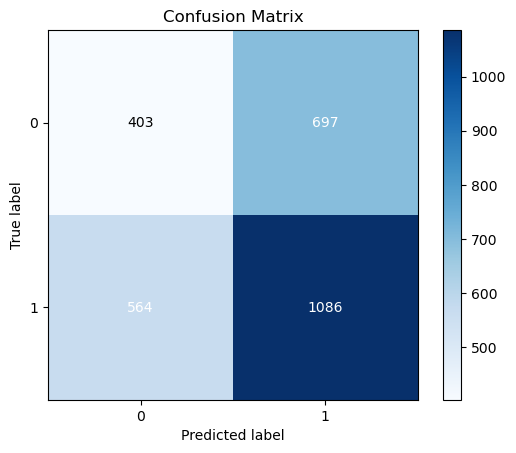

In [261]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result)
plt.show()

In [262]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.5122727272727273

In [263]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.6090858104318564

In [264]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.6581818181818182

In [265]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.6326827847363822

In [266]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0            1  accuracy    macro avg  weighted avg
precision     0.416753     0.609086  0.541455     0.512919      0.532153
recall        0.366364     0.658182  0.541455     0.512273      0.541455
f1-score      0.389937     0.632683  0.541455     0.511310      0.535585
support    1100.000000  1650.000000  0.541455  2750.000000   2750.000000

## Tunning Optuna

In [267]:
from time import time
#Tunning Optuna
import optuna
from optuna.samplers import TPESampler
from optuna.visualization.matplotlib import plot_param_importances

In [277]:
def objective(trial):
    start = time()
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
    }

    # Fit the model
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(X_train_under, y_train_under)
    #prediction
    y_pred = rf_model.predict(X_test_data)
    presisi = precision_score(y_test_data,y_pred)
    
    end=time()
    print ('Time needed (at work) in minutes: {0}'.format((end-start)/60))
    
    return presisi


In [278]:
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=500) # timeout in second
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-12-17 11:53:11,179] A new study created in memory with name: no-name-4f9f93f3-272f-4614-a76d-633cac669a92
[I 2022-12-17 11:53:13,162] Trial 0 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 226, 'max_depth': 31, 'min_samples_split': 69, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.5773409208484221.


Time needed (at work) in minutes: 0.03301283915837606


[I 2022-12-17 11:53:15,713] Trial 1 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 270, 'max_depth': 33, 'min_samples_split': 31, 'min_samples_leaf': 44}. Best is trial 0 with value: 0.5773409208484221.


Time needed (at work) in minutes: 0.04245698054631551


[I 2022-12-17 11:53:22,968] Trial 2 finished with value: 0.5774428274428275 and parameters: {'n_estimators': 689, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.5774428274428275.


Time needed (at work) in minutes: 0.1208081841468811


[I 2022-12-17 11:53:27,111] Trial 3 finished with value: 0.578375581996896 and parameters: {'n_estimators': 413, 'max_depth': 41, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.0689570943514506


[I 2022-12-17 11:53:33,728] Trial 4 finished with value: 0.577639751552795 and parameters: {'n_estimators': 823, 'max_depth': 37, 'min_samples_split': 60, 'min_samples_leaf': 56}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.11023142337799072


[I 2022-12-17 11:53:38,302] Trial 5 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 540, 'max_depth': 34, 'min_samples_split': 53, 'min_samples_leaf': 18}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.07618594964345296


[I 2022-12-17 11:53:42,651] Trial 6 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 515, 'max_depth': 39, 'min_samples_split': 106, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.07245494524637858


[I 2022-12-17 11:53:44,482] Trial 7 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 214, 'max_depth': 17, 'min_samples_split': 98, 'min_samples_leaf': 7}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.030464450518290203


[I 2022-12-17 11:53:49,316] Trial 8 finished with value: 0.5769628099173554 and parameters: {'n_estimators': 508, 'max_depth': 16, 'min_samples_split': 74, 'min_samples_leaf': 44}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.08051662842432658


[I 2022-12-17 11:53:57,657] Trial 9 finished with value: 0.577559462254395 and parameters: {'n_estimators': 886, 'max_depth': 9, 'min_samples_split': 72, 'min_samples_leaf': 26}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.13893324931462606


[I 2022-12-17 11:53:58,752] Trial 10 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 115, 'max_depth': 49, 'min_samples_split': 141, 'min_samples_leaf': 36}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.01818323532740275


[I 2022-12-17 11:54:03,025] Trial 11 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 442, 'max_depth': 43, 'min_samples_split': 112, 'min_samples_leaf': 12}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.07113676071166992


[I 2022-12-17 11:54:06,832] Trial 12 finished with value: 0.578076525336091 and parameters: {'n_estimators': 389, 'max_depth': 43, 'min_samples_split': 121, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.578375581996896.


Time needed (at work) in minutes: 0.06339544455210368


[I 2022-12-17 11:54:13,563] Trial 13 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 639, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.11213251749674479


[I 2022-12-17 11:54:19,918] Trial 14 finished with value: 0.577639751552795 and parameters: {'n_estimators': 686, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 24}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.10586747725804647


[I 2022-12-17 11:54:26,725] Trial 15 finished with value: 0.5770423991726991 and parameters: {'n_estimators': 703, 'max_depth': 25, 'min_samples_split': 40, 'min_samples_leaf': 15}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.11337947448094686


[I 2022-12-17 11:54:29,689] Trial 16 finished with value: 0.5766649457924625 and parameters: {'n_estimators': 338, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 34}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.049352578322092694


[I 2022-12-17 11:54:38,444] Trial 17 finished with value: 0.578375581996896 and parameters: {'n_estimators': 969, 'max_depth': 29, 'min_samples_split': 20, 'min_samples_leaf': 23}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.1458592454592387


[I 2022-12-17 11:54:46,607] Trial 18 finished with value: 0.5771221532091098 and parameters: {'n_estimators': 1000, 'max_depth': 29, 'min_samples_split': 40, 'min_samples_leaf': 27}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.135982076327006


[I 2022-12-17 11:54:50,655] Trial 19 finished with value: 0.5773195876288659 and parameters: {'n_estimators': 606, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.06742473443349202


[I 2022-12-17 11:54:59,064] Trial 20 finished with value: 0.5769628099173554 and parameters: {'n_estimators': 989, 'max_depth': 12, 'min_samples_split': 94, 'min_samples_leaf': 21}. Best is trial 13 with value: 0.5784567581563956.


Time needed (at work) in minutes: 0.14011284907658894


[I 2022-12-17 11:55:07,155] Trial 21 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 797, 'max_depth': 23, 'min_samples_split': 19, 'min_samples_leaf': 14}. Best is trial 21 with value: 0.5786749482401656.


Time needed (at work) in minutes: 0.13471619685490926


[I 2022-12-17 11:55:14,385] Trial 22 finished with value: 0.577559462254395 and parameters: {'n_estimators': 821, 'max_depth': 26, 'min_samples_split': 28, 'min_samples_leaf': 30}. Best is trial 21 with value: 0.5786749482401656.


Time needed (at work) in minutes: 0.12044174671173095


[I 2022-12-17 11:55:22,425] Trial 23 finished with value: 0.5772609819121447 and parameters: {'n_estimators': 877, 'max_depth': 21, 'min_samples_split': 49, 'min_samples_leaf': 16}. Best is trial 21 with value: 0.5786749482401656.


Time needed (at work) in minutes: 0.1339166720708211


[I 2022-12-17 11:55:29,344] Trial 24 finished with value: 0.5789746245468669 and parameters: {'n_estimators': 619, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11524521907170614


[I 2022-12-17 11:55:35,468] Trial 25 finished with value: 0.578076525336091 and parameters: {'n_estimators': 610, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10195507605870564


[I 2022-12-17 11:55:43,620] Trial 26 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 733, 'max_depth': 19, 'min_samples_split': 32, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1357906699180603


[I 2022-12-17 11:55:51,398] Trial 27 finished with value: 0.577559462254395 and parameters: {'n_estimators': 774, 'max_depth': 10, 'min_samples_split': 34, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12952678203582763


[I 2022-12-17 11:55:58,873] Trial 28 finished with value: 0.578076525336091 and parameters: {'n_estimators': 746, 'max_depth': 19, 'min_samples_split': 48, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12442663510640463


[I 2022-12-17 11:56:08,322] Trial 29 finished with value: 0.577559462254395 and parameters: {'n_estimators': 915, 'max_depth': 13, 'min_samples_split': 87, 'min_samples_leaf': 20}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.15741982460021972


[I 2022-12-17 11:56:15,539] Trial 30 finished with value: 0.5786487880350696 and parameters: {'n_estimators': 812, 'max_depth': 7, 'min_samples_split': 59, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1202222983042399


[I 2022-12-17 11:56:21,802] Trial 31 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 787, 'max_depth': 7, 'min_samples_split': 64, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10431843201319377


[I 2022-12-17 11:56:29,117] Trial 32 finished with value: 0.578076525336091 and parameters: {'n_estimators': 747, 'max_depth': 12, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12179102102915446


[I 2022-12-17 11:56:34,934] Trial 33 finished with value: 0.5764102564102564 and parameters: {'n_estimators': 841, 'max_depth': 4, 'min_samples_split': 38, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09687300125757853


[I 2022-12-17 11:56:42,534] Trial 34 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 679, 'max_depth': 22, 'min_samples_split': 24, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12658799489339193


[I 2022-12-17 11:56:47,980] Trial 35 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 576, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09069353739420573


[I 2022-12-17 11:56:57,291] Trial 36 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 920, 'max_depth': 15, 'min_samples_split': 57, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.15510372718175253


[I 2022-12-17 11:57:02,913] Trial 37 finished with value: 0.5770423991726991 and parameters: {'n_estimators': 721, 'max_depth': 33, 'min_samples_split': 83, 'min_samples_leaf': 52}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09364173809687297


[I 2022-12-17 11:57:08,509] Trial 38 finished with value: 0.5782137325761487 and parameters: {'n_estimators': 655, 'max_depth': 8, 'min_samples_split': 44, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09324199358622233


[I 2022-12-17 11:57:16,677] Trial 39 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 792, 'max_depth': 23, 'min_samples_split': 31, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13606560230255127


[I 2022-12-17 11:57:24,937] Trial 40 finished with value: 0.577559462254395 and parameters: {'n_estimators': 807, 'max_depth': 28, 'min_samples_split': 63, 'min_samples_leaf': 17}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1375811497370402


[I 2022-12-17 11:57:33,526] Trial 41 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 844, 'max_depth': 22, 'min_samples_split': 29, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.14306101004282634


[I 2022-12-17 11:57:40,809] Trial 42 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 768, 'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1213245709737142


[I 2022-12-17 11:57:45,759] Trial 43 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 470, 'max_depth': 18, 'min_samples_split': 35, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08238207499186198


[I 2022-12-17 11:57:54,606] Trial 44 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 875, 'max_depth': 15, 'min_samples_split': 24, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.14738373359044393


[I 2022-12-17 11:57:58,486] Trial 45 finished with value: 0.577639751552795 and parameters: {'n_estimators': 437, 'max_depth': 13, 'min_samples_split': 53, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06460980971654257


[I 2022-12-17 11:58:03,327] Trial 46 finished with value: 0.57769747031492 and parameters: {'n_estimators': 527, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 18}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08063312768936157


[I 2022-12-17 11:58:07,606] Trial 47 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 479, 'max_depth': 10, 'min_samples_split': 34, 'min_samples_leaf': 42}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07125567197799683


[I 2022-12-17 11:58:14,221] Trial 48 finished with value: 0.5771428571428572 and parameters: {'n_estimators': 560, 'max_depth': 31, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11014804442723593


[I 2022-12-17 11:58:20,732] Trial 49 finished with value: 0.5773993808049536 and parameters: {'n_estimators': 722, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 22}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10839935938517252


[I 2022-12-17 11:58:25,676] Trial 50 finished with value: 0.5762273901808785 and parameters: {'n_estimators': 641, 'max_depth': 36, 'min_samples_split': 140, 'min_samples_leaf': 60}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08229844172795614


[I 2022-12-17 11:58:29,448] Trial 51 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 364, 'max_depth': 17, 'min_samples_split': 32, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06282764673233032


[I 2022-12-17 11:58:34,376] Trial 52 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 475, 'max_depth': 27, 'min_samples_split': 44, 'min_samples_leaf': 14}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0820662260055542


[I 2022-12-17 11:58:37,703] Trial 53 finished with value: 0.577124868835257 and parameters: {'n_estimators': 285, 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.05539886156717936


[I 2022-12-17 11:58:38,252] Trial 54 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 57, 'max_depth': 25, 'min_samples_split': 68, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0090803861618042


[I 2022-12-17 11:58:48,853] Trial 55 finished with value: 0.577639751552795 and parameters: {'n_estimators': 943, 'max_depth': 20, 'min_samples_split': 39, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.17660578886667888


[I 2022-12-17 11:58:54,642] Trial 56 finished with value: 0.5769628099173554 and parameters: {'n_estimators': 590, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 26}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09642335971196493


[I 2022-12-17 11:58:59,681] Trial 57 finished with value: 0.5776173285198556 and parameters: {'n_estimators': 675, 'max_depth': 6, 'min_samples_split': 77, 'min_samples_leaf': 17}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08391446272532145


[I 2022-12-17 11:59:07,541] Trial 58 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 797, 'max_depth': 24, 'min_samples_split': 56, 'min_samples_leaf': 14}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13095191319783528


[I 2022-12-17 11:59:14,938] Trial 59 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 619, 'max_depth': 31, 'min_samples_split': 21, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12314008076985677


[I 2022-12-17 11:59:22,764] Trial 60 finished with value: 0.577962577962578 and parameters: {'n_estimators': 630, 'max_depth': 31, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13030231793721517


[I 2022-12-17 11:59:28,521] Trial 61 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 551, 'max_depth': 27, 'min_samples_split': 34, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09587364196777344


[I 2022-12-17 11:59:36,127] Trial 62 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 742, 'max_depth': 35, 'min_samples_split': 25, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12670557101567587


[I 2022-12-17 11:59:40,801] Trial 63 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 502, 'max_depth': 19, 'min_samples_split': 48, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07785157759984335


[I 2022-12-17 11:59:49,915] Trial 64 finished with value: 0.5766969535008017 and parameters: {'n_estimators': 707, 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.15162236293156942


[I 2022-12-17 11:59:58,292] Trial 65 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 850, 'max_depth': 47, 'min_samples_split': 30, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13954663674036663


[I 2022-12-17 12:00:05,838] Trial 66 finished with value: 0.577559462254395 and parameters: {'n_estimators': 773, 'max_depth': 29, 'min_samples_split': 19, 'min_samples_leaf': 16}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12568849325180054


[I 2022-12-17 12:00:11,633] Trial 67 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 611, 'max_depth': 23, 'min_samples_split': 11, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0965399702390035


[I 2022-12-17 12:00:17,675] Trial 68 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 667, 'max_depth': 14, 'min_samples_split': 44, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10065400997797648


[I 2022-12-17 12:00:25,099] Trial 69 finished with value: 0.5772609819121447 and parameters: {'n_estimators': 912, 'max_depth': 11, 'min_samples_split': 35, 'min_samples_leaf': 36}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12365639607111613


[I 2022-12-17 12:00:32,702] Trial 70 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 816, 'max_depth': 17, 'min_samples_split': 28, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1266712188720703


[I 2022-12-17 12:00:40,887] Trial 71 finished with value: 0.577995867768595 and parameters: {'n_estimators': 835, 'max_depth': 17, 'min_samples_split': 28, 'min_samples_leaf': 15}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13628188371658326


[I 2022-12-17 12:00:48,866] Trial 72 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 870, 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13290067116419474


[I 2022-12-17 12:00:56,405] Trial 73 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 802, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12558854420979818


[I 2022-12-17 12:01:03,594] Trial 74 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 748, 'max_depth': 16, 'min_samples_split': 26, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11970887978871664


[I 2022-12-17 12:01:10,705] Trial 75 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 819, 'max_depth': 31, 'min_samples_split': 39, 'min_samples_leaf': 20}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11844298044840494


[I 2022-12-17 12:01:17,677] Trial 76 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 699, 'max_depth': 26, 'min_samples_split': 30, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.116136368115743


[I 2022-12-17 12:01:21,526] Trial 77 finished with value: 0.5774793388429752 and parameters: {'n_estimators': 431, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06409347057342529


[I 2022-12-17 12:01:29,194] Trial 78 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 895, 'max_depth': 21, 'min_samples_split': 50, 'min_samples_leaf': 24}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12775383392969766


[I 2022-12-17 12:01:33,012] Trial 79 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 401, 'max_depth': 33, 'min_samples_split': 43, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0635604739189148


[I 2022-12-17 12:01:39,042] Trial 80 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 731, 'max_depth': 18, 'min_samples_split': 37, 'min_samples_leaf': 31}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10043750603993734


[I 2022-12-17 12:01:46,509] Trial 81 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 793, 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12435597976048787


[I 2022-12-17 12:01:53,642] Trial 82 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 764, 'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11879344383875529


[I 2022-12-17 12:02:01,034] Trial 83 finished with value: 0.577995867768595 and parameters: {'n_estimators': 762, 'max_depth': 24, 'min_samples_split': 15, 'min_samples_leaf': 16}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12310680548350016


[I 2022-12-17 12:02:08,238] Trial 84 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 818, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 18}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11997538010279338


[I 2022-12-17 12:02:17,504] Trial 85 finished with value: 0.5780437044745057 and parameters: {'n_estimators': 851, 'max_depth': 26, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1542043725649516


[I 2022-12-17 12:02:21,263] Trial 86 finished with value: 0.577537351880474 and parameters: {'n_estimators': 463, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06257765293121338


[I 2022-12-17 12:02:27,727] Trial 87 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 694, 'max_depth': 28, 'min_samples_split': 31, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10764965613683065


[I 2022-12-17 12:02:33,095] Trial 88 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 651, 'max_depth': 21, 'min_samples_split': 118, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08941100835800171


[I 2022-12-17 12:02:39,233] Trial 89 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 702, 'max_depth': 28, 'min_samples_split': 31, 'min_samples_leaf': 14}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10218650897343953


[I 2022-12-17 12:02:47,896] Trial 90 finished with value: 0.5772655840754322 and parameters: {'n_estimators': 782, 'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.14416881799697875


[I 2022-12-17 12:02:54,711] Trial 91 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 628, 'max_depth': 29, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11352937618891398


[I 2022-12-17 12:03:02,898] Trial 92 finished with value: 0.5778816199376947 and parameters: {'n_estimators': 723, 'max_depth': 30, 'min_samples_split': 27, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13641515572865803


[I 2022-12-17 12:03:09,582] Trial 93 finished with value: 0.577639751552795 and parameters: {'n_estimators': 757, 'max_depth': 26, 'min_samples_split': 98, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11134740511576334


[I 2022-12-17 12:03:14,796] Trial 94 finished with value: 0.578838174273859 and parameters: {'n_estimators': 570, 'max_depth': 22, 'min_samples_split': 33, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0868466337521871


[I 2022-12-17 12:03:19,723] Trial 95 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 526, 'max_depth': 17, 'min_samples_split': 34, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08206558227539062


[I 2022-12-17 12:03:25,263] Trial 96 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 586, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 15}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09227591355641683


[I 2022-12-17 12:03:31,897] Trial 97 finished with value: 0.5781818181818181 and parameters: {'n_estimators': 564, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11041462024052938


[I 2022-12-17 12:03:40,439] Trial 98 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 678, 'max_depth': 32, 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.14226223627726237


[I 2022-12-17 12:03:47,348] Trial 99 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 661, 'max_depth': 28, 'min_samples_split': 41, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11509509086608886


[I 2022-12-17 12:03:54,062] Trial 100 finished with value: 0.5776623376623377 and parameters: {'n_estimators': 613, 'max_depth': 25, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11179711023966471


[I 2022-12-17 12:03:59,907] Trial 101 finished with value: 0.577639751552795 and parameters: {'n_estimators': 541, 'max_depth': 20, 'min_samples_split': 36, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09735608100891113


[I 2022-12-17 12:04:06,704] Trial 102 finished with value: 0.5776623376623377 and parameters: {'n_estimators': 511, 'max_depth': 23, 'min_samples_split': 27, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11321291526158651


[I 2022-12-17 12:04:13,948] Trial 103 finished with value: 0.578375581996896 and parameters: {'n_estimators': 688, 'max_depth': 18, 'min_samples_split': 32, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12067496379216512


[I 2022-12-17 12:04:23,274] Trial 104 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 862, 'max_depth': 20, 'min_samples_split': 30, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1553367535273234


[I 2022-12-17 12:04:32,380] Trial 105 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 825, 'max_depth': 22, 'min_samples_split': 78, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.15170565843582154


[I 2022-12-17 12:04:41,461] Trial 106 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 777, 'max_depth': 15, 'min_samples_split': 59, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1512486775716146


[I 2022-12-17 12:04:43,652] Trial 107 finished with value: 0.5780437044745057 and parameters: {'n_estimators': 172, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.036477271715799967


[I 2022-12-17 12:04:47,477] Trial 108 finished with value: 0.5770811921891058 and parameters: {'n_estimators': 495, 'max_depth': 4, 'min_samples_split': 48, 'min_samples_leaf': 17}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06368362903594971


[I 2022-12-17 12:04:57,549] Trial 109 finished with value: 0.577962577962578 and parameters: {'n_estimators': 731, 'max_depth': 24, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.16776500145594278


[I 2022-12-17 12:05:03,664] Trial 110 finished with value: 0.5769628099173554 and parameters: {'n_estimators': 593, 'max_depth': 25, 'min_samples_split': 41, 'min_samples_leaf': 48}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10177849531173706


[I 2022-12-17 12:05:12,062] Trial 111 finished with value: 0.5777777777777777 and parameters: {'n_estimators': 712, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 15}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13984630505243936


[I 2022-12-17 12:05:20,409] Trial 112 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 486, 'max_depth': 19, 'min_samples_split': 47, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13901353279749554


[I 2022-12-17 12:05:27,445] Trial 113 finished with value: 0.578538102643857 and parameters: {'n_estimators': 461, 'max_depth': 19, 'min_samples_split': 37, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11721044381459554


[I 2022-12-17 12:05:36,040] Trial 114 finished with value: 0.578538102643857 and parameters: {'n_estimators': 804, 'max_depth': 18, 'min_samples_split': 33, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.14319458802541096


[I 2022-12-17 12:05:46,193] Trial 115 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 799, 'max_depth': 22, 'min_samples_split': 33, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.16914477745691936


[I 2022-12-17 12:05:49,990] Trial 116 finished with value: 0.5770423991726991 and parameters: {'n_estimators': 448, 'max_depth': 23, 'min_samples_split': 148, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06321920156478882


[I 2022-12-17 12:05:57,731] Trial 117 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 760, 'max_depth': 17, 'min_samples_split': 28, 'min_samples_leaf': 13}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1289531906445821


[I 2022-12-17 12:06:01,578] Trial 118 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 365, 'max_depth': 27, 'min_samples_split': 38, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06403576930363973


[I 2022-12-17 12:06:07,662] Trial 119 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 572, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1013051430384318


[I 2022-12-17 12:06:13,175] Trial 120 finished with value: 0.5774210253754531 and parameters: {'n_estimators': 635, 'max_depth': 20, 'min_samples_split': 54, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0918095588684082


[I 2022-12-17 12:06:19,874] Trial 121 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 806, 'max_depth': 18, 'min_samples_split': 31, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11158057451248168


[I 2022-12-17 12:06:26,954] Trial 122 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 828, 'max_depth': 18, 'min_samples_split': 36, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11788525978724161


[I 2022-12-17 12:06:34,795] Trial 123 finished with value: 0.5776623376623377 and parameters: {'n_estimators': 886, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.13055344025293986


[I 2022-12-17 12:06:38,399] Trial 124 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 420, 'max_depth': 16, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06001264254252116


[I 2022-12-17 12:06:41,862] Trial 125 finished with value: 0.577639751552795 and parameters: {'n_estimators': 456, 'max_depth': 11, 'min_samples_split': 43, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.057647494475046794


[I 2022-12-17 12:06:49,099] Trial 126 finished with value: 0.5770042194092827 and parameters: {'n_estimators': 749, 'max_depth': 34, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12040846347808838


[I 2022-12-17 12:06:55,308] Trial 127 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 790, 'max_depth': 21, 'min_samples_split': 66, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10343565543492635


[I 2022-12-17 12:07:02,086] Trial 128 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 839, 'max_depth': 23, 'min_samples_split': 22, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11289643446604411


[I 2022-12-17 12:07:07,933] Trial 129 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 769, 'max_depth': 30, 'min_samples_split': 72, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09738943974177043


[I 2022-12-17 12:07:13,845] Trial 130 finished with value: 0.578076525336091 and parameters: {'n_estimators': 739, 'max_depth': 20, 'min_samples_split': 37, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09848958651224772


[I 2022-12-17 12:07:20,013] Trial 131 finished with value: 0.577639751552795 and parameters: {'n_estimators': 781, 'max_depth': 25, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10273614327112833


[I 2022-12-17 12:07:20,495] Trial 132 finished with value: 0.577962577962578 and parameters: {'n_estimators': 56, 'max_depth': 27, 'min_samples_split': 61, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.007978367805480956


[I 2022-12-17 12:07:25,202] Trial 133 finished with value: 0.577995867768595 and parameters: {'n_estimators': 620, 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 19}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07840123573939005


[I 2022-12-17 12:07:29,515] Trial 134 finished with value: 0.577559462254395 and parameters: {'n_estimators': 541, 'max_depth': 19, 'min_samples_split': 47, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07183860143025717


[I 2022-12-17 12:07:33,406] Trial 135 finished with value: 0.578538102643857 and parameters: {'n_estimators': 482, 'max_depth': 19, 'min_samples_split': 46, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06479305426279704


[I 2022-12-17 12:07:37,372] Trial 136 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 477, 'max_depth': 16, 'min_samples_split': 34, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06607556740442912


[I 2022-12-17 12:07:41,538] Trial 137 finished with value: 0.5787564766839378 and parameters: {'n_estimators': 515, 'max_depth': 21, 'min_samples_split': 40, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06935688257217407


[I 2022-12-17 12:07:45,097] Trial 138 finished with value: 0.5768235902741852 and parameters: {'n_estimators': 521, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 40}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.059263161818186444


[I 2022-12-17 12:07:49,069] Trial 139 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 501, 'max_depth': 22, 'min_samples_split': 51, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06615088780721029


[I 2022-12-17 12:07:56,195] Trial 140 finished with value: 0.577559462254395 and parameters: {'n_estimators': 858, 'max_depth': 17, 'min_samples_split': 40, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11868487596511841


[I 2022-12-17 12:08:00,702] Trial 141 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 564, 'max_depth': 18, 'min_samples_split': 45, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07505327065785726


[I 2022-12-17 12:08:04,518] Trial 142 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 466, 'max_depth': 19, 'min_samples_split': 41, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06356043418248494


[I 2022-12-17 12:08:09,316] Trial 143 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 595, 'max_depth': 15, 'min_samples_split': 33, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07990031639734904


[I 2022-12-17 12:08:12,919] Trial 144 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 425, 'max_depth': 17, 'min_samples_split': 25, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.059997403621673585


[I 2022-12-17 12:08:16,091] Trial 145 finished with value: 0.5779153766769866 and parameters: {'n_estimators': 530, 'max_depth': 6, 'min_samples_split': 31, 'min_samples_leaf': 11}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.05280050834019979


[I 2022-12-17 12:08:21,003] Trial 146 finished with value: 0.578538102643857 and parameters: {'n_estimators': 546, 'max_depth': 20, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08181576728820801


[I 2022-12-17 12:08:24,763] Trial 147 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 448, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06262774070103963


[I 2022-12-17 12:08:29,439] Trial 148 finished with value: 0.5781818181818181 and parameters: {'n_estimators': 547, 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07788668870925904


[I 2022-12-17 12:08:36,476] Trial 149 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 817, 'max_depth': 21, 'min_samples_split': 38, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.11722062826156616


[I 2022-12-17 12:08:41,110] Trial 150 finished with value: 0.577559462254395 and parameters: {'n_estimators': 578, 'max_depth': 32, 'min_samples_split': 35, 'min_samples_leaf': 12}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07716867923736573


[I 2022-12-17 12:08:45,194] Trial 151 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 500, 'max_depth': 23, 'min_samples_split': 44, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06800841887791952


[I 2022-12-17 12:08:50,460] Trial 152 finished with value: 0.578538102643857 and parameters: {'n_estimators': 648, 'max_depth': 20, 'min_samples_split': 37, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08769582907358806


[I 2022-12-17 12:08:55,681] Trial 153 finished with value: 0.578375581996896 and parameters: {'n_estimators': 647, 'max_depth': 20, 'min_samples_split': 32, 'min_samples_leaf': 8}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08696267207463583


[I 2022-12-17 12:09:01,323] Trial 154 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 680, 'max_depth': 18, 'min_samples_split': 38, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09395823081334433


[I 2022-12-17 12:09:06,341] Trial 155 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 599, 'max_depth': 21, 'min_samples_split': 41, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.0835647185643514


[I 2022-12-17 12:09:10,321] Trial 156 finished with value: 0.57769747031492 and parameters: {'n_estimators': 513, 'max_depth': 25, 'min_samples_split': 22, 'min_samples_leaf': 16}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06630877256393433


[I 2022-12-17 12:09:16,851] Trial 157 finished with value: 0.578838174273859 and parameters: {'n_estimators': 799, 'max_depth': 18, 'min_samples_split': 35, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10874987840652466


[I 2022-12-17 12:09:23,408] Trial 158 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 804, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.1091821034749349


[I 2022-12-17 12:09:29,329] Trial 159 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 700, 'max_depth': 22, 'min_samples_split': 37, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.09858864148457845


[I 2022-12-17 12:09:35,510] Trial 160 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 780, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 14}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10296138922373453


[I 2022-12-17 12:09:38,839] Trial 161 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 404, 'max_depth': 17, 'min_samples_split': 34, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.055448822180430096


[I 2022-12-17 12:09:43,703] Trial 162 finished with value: 0.577995867768595 and parameters: {'n_estimators': 621, 'max_depth': 20, 'min_samples_split': 41, 'min_samples_leaf': 9}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08099964062372843


[I 2022-12-17 12:09:48,404] Trial 163 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 656, 'max_depth': 18, 'min_samples_split': 31, 'min_samples_leaf': 29}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.07830131848653157


[I 2022-12-17 12:09:56,131] Trial 164 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 840, 'max_depth': 18, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.12870325247446696


[I 2022-12-17 12:10:02,606] Trial 165 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 757, 'max_depth': 19, 'min_samples_split': 35, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.10781628290812174


[I 2022-12-17 12:10:07,671] Trial 166 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 722, 'max_depth': 9, 'min_samples_split': 52, 'min_samples_leaf': 6}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.08436417579650879


[I 2022-12-17 12:10:11,779] Trial 167 finished with value: 0.5766233766233766 and parameters: {'n_estimators': 480, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.5789746245468669.


Time needed (at work) in minutes: 0.06842406590779622


[I 2022-12-17 12:10:18,499] Trial 168 finished with value: 0.5790565059616382 and parameters: {'n_estimators': 809, 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 8}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11191369692484537


[I 2022-12-17 12:10:25,556] Trial 169 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 798, 'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 8}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11750280459721883


[I 2022-12-17 12:10:32,164] Trial 170 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 828, 'max_depth': 30, 'min_samples_split': 27, 'min_samples_leaf': 13}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.10998156070709228


[I 2022-12-17 12:10:36,523] Trial 171 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 554, 'max_depth': 21, 'min_samples_split': 38, 'min_samples_leaf': 11}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.07260483900705973


[I 2022-12-17 12:10:43,643] Trial 172 finished with value: 0.578538102643857 and parameters: {'n_estimators': 770, 'max_depth': 19, 'min_samples_split': 32, 'min_samples_leaf': 7}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11859285036722819


[I 2022-12-17 12:10:50,059] Trial 173 finished with value: 0.5774793388429752 and parameters: {'n_estimators': 771, 'max_depth': 17, 'min_samples_split': 32, 'min_samples_leaf': 9}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.10685017903645834


[I 2022-12-17 12:10:56,424] Trial 174 finished with value: 0.578538102643857 and parameters: {'n_estimators': 756, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 7}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.1060007373491923


[I 2022-12-17 12:11:01,622] Trial 175 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 671, 'max_depth': 21, 'min_samples_split': 45, 'min_samples_leaf': 12}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.08657948176066081


[I 2022-12-17 12:11:07,997] Trial 176 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 744, 'max_depth': 26, 'min_samples_split': 21, 'min_samples_leaf': 7}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.10616730054219564


[I 2022-12-17 12:11:14,703] Trial 177 finished with value: 0.578838174273859 and parameters: {'n_estimators': 809, 'max_depth': 19, 'min_samples_split': 29, 'min_samples_leaf': 5}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11169833342234294


[I 2022-12-17 12:11:21,447] Trial 178 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 814, 'max_depth': 23, 'min_samples_split': 28, 'min_samples_leaf': 5}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11228012641270955


[I 2022-12-17 12:11:28,320] Trial 179 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 818, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 5}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11446213324864705


[I 2022-12-17 12:11:36,354] Trial 180 finished with value: 0.5772655840754322 and parameters: {'n_estimators': 862, 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.1337334911028544


[I 2022-12-17 12:11:42,722] Trial 181 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 793, 'max_depth': 18, 'min_samples_split': 30, 'min_samples_leaf': 10}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.10601734320322673


[I 2022-12-17 12:11:49,424] Trial 182 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 810, 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 8}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.1116305947303772


[I 2022-12-17 12:11:57,085] Trial 183 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 844, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.1275707244873047


[I 2022-12-17 12:12:02,976] Trial 184 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 827, 'max_depth': 28, 'min_samples_split': 129, 'min_samples_leaf': 4}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.098138956228892


[I 2022-12-17 12:12:09,749] Trial 185 finished with value: 0.5772230889235569 and parameters: {'n_estimators': 793, 'max_depth': 24, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.11282983620961508


[I 2022-12-17 12:12:16,065] Trial 186 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 759, 'max_depth': 20, 'min_samples_split': 24, 'min_samples_leaf': 7}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.1052097201347351


[I 2022-12-17 12:12:22,256] Trial 187 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 736, 'max_depth': 19, 'min_samples_split': 26, 'min_samples_leaf': 9}. Best is trial 168 with value: 0.5790565059616382.


Time needed (at work) in minutes: 0.10305256048838297


[I 2022-12-17 12:12:28,879] Trial 188 finished with value: 0.5791925465838509 and parameters: {'n_estimators': 808, 'max_depth': 22, 'min_samples_split': 34, 'min_samples_leaf': 6}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11029807726542155


[I 2022-12-17 12:12:35,261] Trial 189 finished with value: 0.577639751552795 and parameters: {'n_estimators': 782, 'max_depth': 38, 'min_samples_split': 33, 'min_samples_leaf': 8}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.10630190372467041


[I 2022-12-17 12:12:42,578] Trial 190 finished with value: 0.578563995837669 and parameters: {'n_estimators': 812, 'max_depth': 23, 'min_samples_split': 17, 'min_samples_leaf': 6}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12175756692886353


[I 2022-12-17 12:12:50,053] Trial 191 finished with value: 0.5772230889235569 and parameters: {'n_estimators': 834, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12447267373402914


[I 2022-12-17 12:12:57,189] Trial 192 finished with value: 0.577743109724389 and parameters: {'n_estimators': 815, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11878916025161743


[I 2022-12-17 12:13:04,249] Trial 193 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 874, 'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 11}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11752691268920898


[I 2022-12-17 12:13:10,500] Trial 194 finished with value: 0.5771221532091098 and parameters: {'n_estimators': 866, 'max_depth': 24, 'min_samples_split': 87, 'min_samples_leaf': 11}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.10411855379740396


[I 2022-12-17 12:13:17,575] Trial 195 finished with value: 0.5789746245468669 and parameters: {'n_estimators': 894, 'max_depth': 22, 'min_samples_split': 16, 'min_samples_leaf': 14}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.1178433100382487


[I 2022-12-17 12:13:24,967] Trial 196 finished with value: 0.578076525336091 and parameters: {'n_estimators': 947, 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 15}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12309006849924724


[I 2022-12-17 12:13:31,819] Trial 197 finished with value: 0.5774793388429752 and parameters: {'n_estimators': 868, 'max_depth': 22, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11409571965535482


[I 2022-12-17 12:13:39,072] Trial 198 finished with value: 0.578375581996896 and parameters: {'n_estimators': 902, 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 12}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12080872853597005


[I 2022-12-17 12:13:46,588] Trial 199 finished with value: 0.577559462254395 and parameters: {'n_estimators': 942, 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12520545721054077


[I 2022-12-17 12:13:53,797] Trial 200 finished with value: 0.578076525336091 and parameters: {'n_estimators': 917, 'max_depth': 21, 'min_samples_split': 17, 'min_samples_leaf': 17}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12004201809565226


[I 2022-12-17 12:14:01,423] Trial 201 finished with value: 0.577559462254395 and parameters: {'n_estimators': 892, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.1269877036412557


[I 2022-12-17 12:14:07,651] Trial 202 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 778, 'max_depth': 22, 'min_samples_split': 30, 'min_samples_leaf': 15}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.10373550653457642


[I 2022-12-17 12:14:15,238] Trial 203 finished with value: 0.5784823284823285 and parameters: {'n_estimators': 847, 'max_depth': 21, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12633016506830852


[I 2022-12-17 12:14:22,456] Trial 204 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 808, 'max_depth': 23, 'min_samples_split': 22, 'min_samples_leaf': 9}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.12015856504440307


[I 2022-12-17 12:14:29,518] Trial 205 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 883, 'max_depth': 25, 'min_samples_split': 13, 'min_samples_leaf': 13}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11761019627253215


[I 2022-12-17 12:14:34,645] Trial 206 finished with value: 0.5766649457924625 and parameters: {'n_estimators': 792, 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 55}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.08542283376057942


[I 2022-12-17 12:14:41,179] Trial 207 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 829, 'max_depth': 45, 'min_samples_split': 35, 'min_samples_leaf': 11}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.10883229970932007


[I 2022-12-17 12:14:47,910] Trial 208 finished with value: 0.579002079002079 and parameters: {'n_estimators': 813, 'max_depth': 23, 'min_samples_split': 28, 'min_samples_leaf': 5}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11211445728937784


[I 2022-12-17 12:14:54,547] Trial 209 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 812, 'max_depth': 24, 'min_samples_split': 28, 'min_samples_leaf': 8}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11056474447250367


[I 2022-12-17 12:15:01,724] Trial 210 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 851, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11952560742696126


[I 2022-12-17 12:15:08,671] Trial 211 finished with value: 0.5769828926905132 and parameters: {'n_estimators': 824, 'max_depth': 22, 'min_samples_split': 30, 'min_samples_leaf': 5}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11569471756617228


[I 2022-12-17 12:15:15,250] Trial 212 finished with value: 0.578538102643857 and parameters: {'n_estimators': 793, 'max_depth': 21, 'min_samples_split': 33, 'min_samples_leaf': 4}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.10958193937937419


[I 2022-12-17 12:15:21,547] Trial 213 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 772, 'max_depth': 23, 'min_samples_split': 31, 'min_samples_leaf': 7}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.10486809015274048


[I 2022-12-17 12:15:28,533] Trial 214 finished with value: 0.5773624091381101 and parameters: {'n_estimators': 810, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11632766326268514


[I 2022-12-17 12:15:35,631] Trial 215 finished with value: 0.5779051589369463 and parameters: {'n_estimators': 789, 'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 188 with value: 0.5791925465838509.


Time needed (at work) in minutes: 0.11819353898366293


[I 2022-12-17 12:15:41,824] Trial 216 finished with value: 0.5794924909373381 and parameters: {'n_estimators': 761, 'max_depth': 16, 'min_samples_split': 29, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1031691312789917


[I 2022-12-17 12:15:47,728] Trial 217 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 733, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09833881855010987


[I 2022-12-17 12:15:54,998] Trial 218 finished with value: 0.577559462254395 and parameters: {'n_estimators': 845, 'max_depth': 17, 'min_samples_split': 28, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12112481991449991


[I 2022-12-17 12:16:01,256] Trial 219 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 781, 'max_depth': 15, 'min_samples_split': 34, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10421847899754842


[I 2022-12-17 12:16:06,927] Trial 220 finished with value: 0.578892912571133 and parameters: {'n_estimators': 716, 'max_depth': 32, 'min_samples_split': 19, 'min_samples_leaf': 14}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09447460969289144


[I 2022-12-17 12:16:12,326] Trial 221 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 698, 'max_depth': 31, 'min_samples_split': 19, 'min_samples_leaf': 16}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08989403247833253


[I 2022-12-17 12:16:17,959] Trial 222 finished with value: 0.578375581996896 and parameters: {'n_estimators': 709, 'max_depth': 31, 'min_samples_split': 23, 'min_samples_leaf': 13}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.0938421368598938


[I 2022-12-17 12:16:24,135] Trial 223 finished with value: 0.578076525336091 and parameters: {'n_estimators': 757, 'max_depth': 32, 'min_samples_split': 29, 'min_samples_leaf': 14}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10286930402119955


[I 2022-12-17 12:16:30,111] Trial 224 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 721, 'max_depth': 33, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09953811168670654


[I 2022-12-17 12:16:36,641] Trial 225 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 742, 'max_depth': 35, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10864907105763753


[I 2022-12-17 12:16:43,074] Trial 226 finished with value: 0.578076525336091 and parameters: {'n_estimators': 803, 'max_depth': 29, 'min_samples_split': 25, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10716671546300252


[I 2022-12-17 12:16:49,587] Trial 227 finished with value: 0.578076525336091 and parameters: {'n_estimators': 833, 'max_depth': 34, 'min_samples_split': 30, 'min_samples_leaf': 15}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10848319133122762


[I 2022-12-17 12:16:56,003] Trial 228 finished with value: 0.5787012987012987 and parameters: {'n_estimators': 774, 'max_depth': 23, 'min_samples_split': 22, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1068670908610026


[I 2022-12-17 12:17:02,416] Trial 229 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 769, 'max_depth': 21, 'min_samples_split': 21, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10683359305063883


[I 2022-12-17 12:17:08,404] Trial 230 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 750, 'max_depth': 13, 'min_samples_split': 27, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09975460370381674


[I 2022-12-17 12:17:14,139] Trial 231 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 747, 'max_depth': 11, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09551709095637004


[I 2022-12-17 12:17:20,013] Trial 232 finished with value: 0.5774793388429752 and parameters: {'n_estimators': 763, 'max_depth': 13, 'min_samples_split': 35, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09783909718195598


[I 2022-12-17 12:17:24,838] Trial 233 finished with value: 0.5774575398867731 and parameters: {'n_estimators': 715, 'max_depth': 8, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08038332064946492


[I 2022-12-17 12:17:31,242] Trial 234 finished with value: 0.577559462254395 and parameters: {'n_estimators': 789, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10665027697881063


[I 2022-12-17 12:17:36,994] Trial 235 finished with value: 0.5774793388429752 and parameters: {'n_estimators': 738, 'max_depth': 14, 'min_samples_split': 31, 'min_samples_leaf': 14}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09581565856933594


[I 2022-12-17 12:17:43,237] Trial 236 finished with value: 0.578892912571133 and parameters: {'n_estimators': 775, 'max_depth': 15, 'min_samples_split': 29, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10400199095408122


[I 2022-12-17 12:17:49,503] Trial 237 finished with value: 0.577639751552795 and parameters: {'n_estimators': 773, 'max_depth': 15, 'min_samples_split': 27, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10438510179519653


[I 2022-12-17 12:17:55,097] Trial 238 finished with value: 0.5771221532091098 and parameters: {'n_estimators': 753, 'max_depth': 13, 'min_samples_split': 33, 'min_samples_leaf': 34}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09315878550211588


[I 2022-12-17 12:17:59,513] Trial 239 finished with value: 0.5771604938271605 and parameters: {'n_estimators': 798, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.0735375722249349


[I 2022-12-17 12:18:05,089] Trial 240 finished with value: 0.5777777777777777 and parameters: {'n_estimators': 693, 'max_depth': 16, 'min_samples_split': 31, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09287554820378621


[I 2022-12-17 12:18:11,529] Trial 241 finished with value: 0.5787564766839378 and parameters: {'n_estimators': 779, 'max_depth': 16, 'min_samples_split': 28, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10721663236618043


[I 2022-12-17 12:18:17,724] Trial 242 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 771, 'max_depth': 15, 'min_samples_split': 35, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10318580071131388


[I 2022-12-17 12:18:24,494] Trial 243 finished with value: 0.578838174273859 and parameters: {'n_estimators': 795, 'max_depth': 17, 'min_samples_split': 28, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11277986367543538


[I 2022-12-17 12:18:31,019] Trial 244 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 782, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10870063702265421


[I 2022-12-17 12:18:37,642] Trial 245 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 818, 'max_depth': 15, 'min_samples_split': 29, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11030772924423218


[I 2022-12-17 12:18:43,990] Trial 246 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 798, 'max_depth': 17, 'min_samples_split': 29, 'min_samples_leaf': 13}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10573424895604451


[I 2022-12-17 12:18:50,022] Trial 247 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 755, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10048743486404418


[I 2022-12-17 12:18:56,119] Trial 248 finished with value: 0.5787012987012987 and parameters: {'n_estimators': 736, 'max_depth': 18, 'min_samples_split': 32, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10154620409011841


[I 2022-12-17 12:19:02,241] Trial 249 finished with value: 0.5789200415368639 and parameters: {'n_estimators': 732, 'max_depth': 17, 'min_samples_split': 32, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10196989377339681


[I 2022-12-17 12:19:08,183] Trial 250 finished with value: 0.578538102643857 and parameters: {'n_estimators': 718, 'max_depth': 17, 'min_samples_split': 33, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09897176027297974


[I 2022-12-17 12:19:14,460] Trial 251 finished with value: 0.5781818181818181 and parameters: {'n_estimators': 753, 'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1045526146888733


[I 2022-12-17 12:19:21,022] Trial 252 finished with value: 0.577962577962578 and parameters: {'n_estimators': 778, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10926540295282999


[I 2022-12-17 12:19:26,712] Trial 253 finished with value: 0.578538102643857 and parameters: {'n_estimators': 732, 'max_depth': 17, 'min_samples_split': 39, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09479105869928996


[I 2022-12-17 12:19:33,154] Trial 254 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 789, 'max_depth': 16, 'min_samples_split': 32, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10731656551361084


[I 2022-12-17 12:19:40,408] Trial 255 finished with value: 0.5763338615953513 and parameters: {'n_estimators': 736, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12068339983622232


[I 2022-12-17 12:19:47,037] Trial 256 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 762, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11039800643920898


[I 2022-12-17 12:19:53,331] Trial 257 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 798, 'max_depth': 18, 'min_samples_split': 36, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10481882890065511


[I 2022-12-17 12:20:00,612] Trial 258 finished with value: 0.578076525336091 and parameters: {'n_estimators': 877, 'max_depth': 50, 'min_samples_split': 31, 'min_samples_leaf': 15}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12119131485621135


[I 2022-12-17 12:20:06,116] Trial 259 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 827, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 46}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09169295231501261


[I 2022-12-17 12:20:11,909] Trial 260 finished with value: 0.5774793388429752 and parameters: {'n_estimators': 774, 'max_depth': 17, 'min_samples_split': 71, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09648996591567993


[I 2022-12-17 12:20:18,891] Trial 261 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 816, 'max_depth': 22, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11632062594095866


[I 2022-12-17 12:20:26,046] Trial 262 finished with value: 0.577743109724389 and parameters: {'n_estimators': 842, 'max_depth': 23, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11919248898824056


[I 2022-12-17 12:20:31,817] Trial 263 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 791, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 24}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09612352848052978


[I 2022-12-17 12:20:37,407] Trial 264 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 711, 'max_depth': 18, 'min_samples_split': 33, 'min_samples_leaf': 13}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09312543471654257


[I 2022-12-17 12:20:44,098] Trial 265 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 936, 'max_depth': 15, 'min_samples_split': 108, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11144729455312093


[I 2022-12-17 12:20:49,577] Trial 266 finished with value: 0.578076525336091 and parameters: {'n_estimators': 757, 'max_depth': 12, 'min_samples_split': 79, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09127655824025473


[I 2022-12-17 12:20:55,974] Trial 267 finished with value: 0.577559462254395 and parameters: {'n_estimators': 811, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 14}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10655123790105184


[I 2022-12-17 12:21:00,927] Trial 268 finished with value: 0.577537351880474 and parameters: {'n_estimators': 777, 'max_depth': 7, 'min_samples_split': 22, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08249866167704265


[I 2022-12-17 12:21:07,126] Trial 269 finished with value: 0.5772609819121447 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 35, 'min_samples_leaf': 16}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10325246254603068


[I 2022-12-17 12:21:09,174] Trial 270 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 241, 'max_depth': 40, 'min_samples_split': 31, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.03409544229507446


[I 2022-12-17 12:21:15,980] Trial 271 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 856, 'max_depth': 18, 'min_samples_split': 38, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11337945063908896


[I 2022-12-17 12:21:21,644] Trial 272 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 828, 'max_depth': 23, 'min_samples_split': 29, 'min_samples_leaf': 39}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.0943246881167094


[I 2022-12-17 12:21:28,623] Trial 273 finished with value: 0.576722338204593 and parameters: {'n_estimators': 750, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1162110686302185


[I 2022-12-17 12:21:35,113] Trial 274 finished with value: 0.5787831513260531 and parameters: {'n_estimators': 741, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10800019105275473


[I 2022-12-17 12:21:43,610] Trial 275 finished with value: 0.5778240499739719 and parameters: {'n_estimators': 977, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1415286143620809


[I 2022-12-17 12:21:50,295] Trial 276 finished with value: 0.578672242550967 and parameters: {'n_estimators': 731, 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11131538550059


[I 2022-12-17 12:21:57,432] Trial 277 finished with value: 0.5784518828451883 and parameters: {'n_estimators': 730, 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11874276796976725


[I 2022-12-17 12:22:04,130] Trial 278 finished with value: 0.5764397905759162 and parameters: {'n_estimators': 726, 'max_depth': 21, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11153063774108887


[I 2022-12-17 12:22:11,925] Trial 279 finished with value: 0.5765911542610572 and parameters: {'n_estimators': 745, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1295361121495565


[I 2022-12-17 12:22:18,273] Trial 280 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 765, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10566919644673665


[I 2022-12-17 12:22:24,722] Trial 281 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 745, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10741651058197021


[I 2022-12-17 12:22:31,688] Trial 282 finished with value: 0.5781818181818181 and parameters: {'n_estimators': 780, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11591121753056845


[I 2022-12-17 12:22:38,317] Trial 283 finished with value: 0.5779864371413668 and parameters: {'n_estimators': 708, 'max_depth': 20, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11038954257965088


[I 2022-12-17 12:22:44,797] Trial 284 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 765, 'max_depth': 18, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10795867840449015


[I 2022-12-17 12:22:52,234] Trial 285 finished with value: 0.5781818181818181 and parameters: {'n_estimators': 905, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12378962437311808


[I 2022-12-17 12:22:59,279] Trial 286 finished with value: 0.5778240499739719 and parameters: {'n_estimators': 786, 'max_depth': 22, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11731032927831014


[I 2022-12-17 12:23:05,761] Trial 287 finished with value: 0.5776623376623377 and parameters: {'n_estimators': 726, 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10794953107833863


[I 2022-12-17 12:23:11,500] Trial 288 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 687, 'max_depth': 19, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09557385047276815


[I 2022-12-17 12:23:17,937] Trial 289 finished with value: 0.5776623376623377 and parameters: {'n_estimators': 744, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10720142523447672


[I 2022-12-17 12:23:24,167] Trial 290 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 767, 'max_depth': 21, 'min_samples_split': 28, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10376878182093302


[I 2022-12-17 12:23:31,290] Trial 291 finished with value: 0.579002079002079 and parameters: {'n_estimators': 798, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11854293346405029


[I 2022-12-17 12:23:38,503] Trial 292 finished with value: 0.5773034877667881 and parameters: {'n_estimators': 806, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12010887463887533


[I 2022-12-17 12:23:45,485] Trial 293 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 793, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11626100142796834


[I 2022-12-17 12:23:52,655] Trial 294 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 826, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1193184773127238


[I 2022-12-17 12:23:59,243] Trial 295 finished with value: 0.5771812080536913 and parameters: {'n_estimators': 805, 'max_depth': 16, 'min_samples_split': 32, 'min_samples_leaf': 18}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10973172982533773


[I 2022-12-17 12:24:06,181] Trial 296 finished with value: 0.577743109724389 and parameters: {'n_estimators': 783, 'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11552813847859701


[I 2022-12-17 12:24:12,429] Trial 297 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 846, 'max_depth': 17, 'min_samples_split': 34, 'min_samples_leaf': 22}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10408523877461752


[I 2022-12-17 12:24:20,175] Trial 298 finished with value: 0.578538102643857 and parameters: {'n_estimators': 924, 'max_depth': 14, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1290198604265849


[I 2022-12-17 12:24:24,348] Trial 299 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 519, 'max_depth': 18, 'min_samples_split': 30, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.06950678825378417


[I 2022-12-17 12:24:31,409] Trial 300 finished with value: 0.5789746245468669 and parameters: {'n_estimators': 880, 'max_depth': 18, 'min_samples_split': 23, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11754353443781534


[I 2022-12-17 12:24:39,309] Trial 301 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 893, 'max_depth': 19, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13156845172246298


[I 2022-12-17 12:24:46,278] Trial 302 finished with value: 0.5788113695090439 and parameters: {'n_estimators': 848, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 14}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11609447399775187


[I 2022-12-17 12:24:53,059] Trial 303 finished with value: 0.5769628099173554 and parameters: {'n_estimators': 869, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 15}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11294651428858439


[I 2022-12-17 12:24:59,338] Trial 304 finished with value: 0.5777777777777777 and parameters: {'n_estimators': 873, 'max_depth': 16, 'min_samples_split': 28, 'min_samples_leaf': 26}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10460158983866373


[I 2022-12-17 12:25:06,411] Trial 305 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 891, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 13}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11781007448832194


[I 2022-12-17 12:25:12,898] Trial 306 finished with value: 0.5777777777777777 and parameters: {'n_estimators': 845, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 17}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10804942846298218


[I 2022-12-17 12:25:13,941] Trial 307 finished with value: 0.5768235902741852 and parameters: {'n_estimators': 118, 'max_depth': 18, 'min_samples_split': 24, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.0173479159673055


[I 2022-12-17 12:25:20,801] Trial 308 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 861, 'max_depth': 17, 'min_samples_split': 36, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11424556175867716


[I 2022-12-17 12:25:27,493] Trial 309 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 828, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11149733066558838


[I 2022-12-17 12:25:35,017] Trial 310 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 872, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12530664205551148


[I 2022-12-17 12:25:42,342] Trial 311 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 916, 'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 13}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12200748523076375


[I 2022-12-17 12:25:49,118] Trial 312 finished with value: 0.5789746245468669 and parameters: {'n_estimators': 815, 'max_depth': 19, 'min_samples_split': 25, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11280695994695028


[I 2022-12-17 12:25:56,953] Trial 313 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 832, 'max_depth': 18, 'min_samples_split': 32, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13053547143936156


[I 2022-12-17 12:26:03,630] Trial 314 finished with value: 0.5789200415368639 and parameters: {'n_estimators': 812, 'max_depth': 17, 'min_samples_split': 26, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11119749943415323


[I 2022-12-17 12:26:10,944] Trial 315 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 842, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12174095710118611


[I 2022-12-17 12:26:17,677] Trial 316 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 811, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1121315042177836


[I 2022-12-17 12:26:25,012] Trial 317 finished with value: 0.578538102643857 and parameters: {'n_estimators': 864, 'max_depth': 37, 'min_samples_split': 26, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1221906026204427


[I 2022-12-17 12:26:31,248] Trial 318 finished with value: 0.57769747031492 and parameters: {'n_estimators': 803, 'max_depth': 18, 'min_samples_split': 22, 'min_samples_leaf': 16}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10385208527247111


[I 2022-12-17 12:26:37,841] Trial 319 finished with value: 0.5794392523364486 and parameters: {'n_estimators': 772, 'max_depth': 17, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10982385079065958


[I 2022-12-17 12:26:44,652] Trial 320 finished with value: 0.5791385573430202 and parameters: {'n_estimators': 784, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11344605684280396


[I 2022-12-17 12:26:51,434] Trial 321 finished with value: 0.5771428571428572 and parameters: {'n_estimators': 782, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11289716164271037


[I 2022-12-17 12:26:58,399] Trial 322 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 818, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1160444974899292


[I 2022-12-17 12:27:04,984] Trial 323 finished with value: 0.5775234131113424 and parameters: {'n_estimators': 794, 'max_depth': 18, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10966512362162271


[I 2022-12-17 12:27:10,058] Trial 324 finished with value: 0.577003121748179 and parameters: {'n_estimators': 570, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08443083763122558


[I 2022-12-17 12:27:16,652] Trial 325 finished with value: 0.5780437044745057 and parameters: {'n_estimators': 768, 'max_depth': 19, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10984078645706177


[I 2022-12-17 12:27:19,378] Trial 326 finished with value: 0.578076525336091 and parameters: {'n_estimators': 325, 'max_depth': 15, 'min_samples_split': 28, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.04537180662155151


[I 2022-12-17 12:27:26,121] Trial 327 finished with value: 0.5792746113989637 and parameters: {'n_estimators': 818, 'max_depth': 17, 'min_samples_split': 32, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11231348117192587


[I 2022-12-17 12:27:32,947] Trial 328 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 834, 'max_depth': 17, 'min_samples_split': 34, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11371256907780965


[I 2022-12-17 12:27:39,705] Trial 329 finished with value: 0.5773624091381101 and parameters: {'n_estimators': 818, 'max_depth': 16, 'min_samples_split': 23, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11256340344746908


[I 2022-12-17 12:27:46,225] Trial 330 finished with value: 0.5790565059616382 and parameters: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 30, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10859910249710084


[I 2022-12-17 12:27:52,819] Trial 331 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 814, 'max_depth': 15, 'min_samples_split': 38, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10982439517974854


[I 2022-12-17 12:28:00,363] Trial 332 finished with value: 0.578563995837669 and parameters: {'n_estimators': 847, 'max_depth': 16, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1256385127703349


[I 2022-12-17 12:28:07,103] Trial 333 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 802, 'max_depth': 14, 'min_samples_split': 41, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11221355199813843


[I 2022-12-17 12:28:15,372] Trial 334 finished with value: 0.5774428274428275 and parameters: {'n_estimators': 839, 'max_depth': 17, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13773097594579062


[I 2022-12-17 12:28:23,154] Trial 335 finished with value: 0.578538102643857 and parameters: {'n_estimators': 787, 'max_depth': 18, 'min_samples_split': 31, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12958604097366333


[I 2022-12-17 12:28:30,561] Trial 336 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 813, 'max_depth': 15, 'min_samples_split': 34, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12338173786799113


[I 2022-12-17 12:28:37,707] Trial 337 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 829, 'max_depth': 16, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11905978123346965


[I 2022-12-17 12:28:44,561] Trial 338 finished with value: 0.5776623376623377 and parameters: {'n_estimators': 796, 'max_depth': 19, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11411232550938924


[I 2022-12-17 12:28:50,970] Trial 339 finished with value: 0.578538102643857 and parameters: {'n_estimators': 789, 'max_depth': 20, 'min_samples_split': 36, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10675024588902791


[I 2022-12-17 12:28:58,062] Trial 340 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 854, 'max_depth': 17, 'min_samples_split': 31, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11814320087432861


[I 2022-12-17 12:29:04,966] Trial 341 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 828, 'max_depth': 15, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11496179501215617


[I 2022-12-17 12:29:11,502] Trial 342 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 806, 'max_depth': 18, 'min_samples_split': 33, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1088489294052124


[I 2022-12-17 12:29:16,795] Trial 343 finished with value: 0.5774428274428275 and parameters: {'n_estimators': 602, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08812856674194336


[I 2022-12-17 12:29:22,399] Trial 344 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 773, 'max_depth': 19, 'min_samples_split': 100, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09337523778279623


[I 2022-12-17 12:29:29,192] Trial 345 finished with value: 0.5790565059616382 and parameters: {'n_estimators': 815, 'max_depth': 17, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11312959988911947


[I 2022-12-17 12:29:36,407] Trial 346 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 857, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12013467947642008


[I 2022-12-17 12:29:43,892] Trial 347 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 822, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12467244068781534


[I 2022-12-17 12:29:49,976] Trial 348 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 839, 'max_depth': 20, 'min_samples_split': 122, 'min_samples_leaf': 1}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10135437250137329


[I 2022-12-17 12:29:53,764] Trial 349 finished with value: 0.5771221532091098 and parameters: {'n_estimators': 541, 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 51}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.06307036876678467


[I 2022-12-17 12:30:00,632] Trial 350 finished with value: 0.5790565059616382 and parameters: {'n_estimators': 789, 'max_depth': 16, 'min_samples_split': 22, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11436217625935872


[I 2022-12-17 12:30:07,298] Trial 351 finished with value: 0.579002079002079 and parameters: {'n_estimators': 798, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11103096803029379


[I 2022-12-17 12:30:14,000] Trial 352 finished with value: 0.578838174273859 and parameters: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11161389350891113


[I 2022-12-17 12:30:20,963] Trial 353 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 804, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11599455277125041


[I 2022-12-17 12:30:27,634] Trial 354 finished with value: 0.5787012987012987 and parameters: {'n_estimators': 795, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11106425126393636


[I 2022-12-17 12:30:35,572] Trial 355 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 956, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13216846386591594


[I 2022-12-17 12:30:42,191] Trial 356 finished with value: 0.578076525336091 and parameters: {'n_estimators': 813, 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11026473840077718


[I 2022-12-17 12:30:48,657] Trial 357 finished with value: 0.577639751552795 and parameters: {'n_estimators': 789, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10770518779754638


[I 2022-12-17 12:30:55,011] Trial 358 finished with value: 0.5791385573430202 and parameters: {'n_estimators': 764, 'max_depth': 17, 'min_samples_split': 26, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10578500032424927


[I 2022-12-17 12:31:01,342] Trial 359 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 758, 'max_depth': 17, 'min_samples_split': 26, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1054510792096456


[I 2022-12-17 12:31:07,675] Trial 360 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 770, 'max_depth': 16, 'min_samples_split': 22, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10550107558568318


[I 2022-12-17 12:31:14,197] Trial 361 finished with value: 0.578538102643857 and parameters: {'n_estimators': 777, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10856580336888631


[I 2022-12-17 12:31:20,834] Trial 362 finished with value: 0.5781818181818181 and parameters: {'n_estimators': 795, 'max_depth': 17, 'min_samples_split': 25, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11056456963221233


[I 2022-12-17 12:31:27,591] Trial 363 finished with value: 0.5787564766839378 and parameters: {'n_estimators': 818, 'max_depth': 17, 'min_samples_split': 30, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11253001689910888


[I 2022-12-17 12:31:32,963] Trial 364 finished with value: 0.5772609819121447 and parameters: {'n_estimators': 761, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 32}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.0894776701927185


[I 2022-12-17 12:31:38,000] Trial 365 finished with value: 0.5761486835312338 and parameters: {'n_estimators': 784, 'max_depth': 15, 'min_samples_split': 24, 'min_samples_leaf': 59}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08392373720804851


[I 2022-12-17 12:31:44,511] Trial 366 finished with value: 0.578838174273859 and parameters: {'n_estimators': 798, 'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10843249956766764


[I 2022-12-17 12:31:51,099] Trial 367 finished with value: 0.5792746113989637 and parameters: {'n_estimators': 800, 'max_depth': 14, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10969928105672201


[I 2022-12-17 12:31:58,065] Trial 368 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 817, 'max_depth': 14, 'min_samples_split': 26, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11604450941085816


[I 2022-12-17 12:32:04,362] Trial 369 finished with value: 0.5791385573430202 and parameters: {'n_estimators': 763, 'max_depth': 16, 'min_samples_split': 28, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10488470792770385


[I 2022-12-17 12:32:10,971] Trial 370 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 763, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11003149350484212


[I 2022-12-17 12:32:17,142] Trial 371 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 754, 'max_depth': 16, 'min_samples_split': 22, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10276963710784912


[I 2022-12-17 12:32:24,013] Trial 372 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 828, 'max_depth': 14, 'min_samples_split': 29, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11444549957911174


[I 2022-12-17 12:32:30,492] Trial 373 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 780, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10793289740880331


[I 2022-12-17 12:32:36,878] Trial 374 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 775, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10637582937876383


[I 2022-12-17 12:32:43,144] Trial 375 finished with value: 0.5780437044745057 and parameters: {'n_estimators': 749, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10430180629094442


[I 2022-12-17 12:32:49,810] Trial 376 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 806, 'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11103171904881795


[I 2022-12-17 12:32:56,917] Trial 377 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 828, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11839418411254883


[I 2022-12-17 12:33:03,306] Trial 378 finished with value: 0.578375581996896 and parameters: {'n_estimators': 806, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10640049775441487


[I 2022-12-17 12:33:09,628] Trial 379 finished with value: 0.5782945736434109 and parameters: {'n_estimators': 766, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10531781514485677


[I 2022-12-17 12:33:15,444] Trial 380 finished with value: 0.5772609819121447 and parameters: {'n_estimators': 782, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09686758915583292


[I 2022-12-17 12:33:22,504] Trial 381 finished with value: 0.5771221532091098 and parameters: {'n_estimators': 998, 'max_depth': 18, 'min_samples_split': 32, 'min_samples_leaf': 29}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11759347518285115


[I 2022-12-17 12:33:29,023] Trial 382 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 791, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10858248869578044


[I 2022-12-17 12:33:35,266] Trial 383 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 763, 'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10400274991989136


[I 2022-12-17 12:33:41,826] Trial 384 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 785, 'max_depth': 18, 'min_samples_split': 30, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10924870173136393


[I 2022-12-17 12:33:48,759] Trial 385 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 821, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11551143725713094


[I 2022-12-17 12:33:54,861] Trial 386 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 668, 'max_depth': 43, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10159653822580973


[I 2022-12-17 12:34:01,048] Trial 387 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 741, 'max_depth': 17, 'min_samples_split': 29, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10300260782241821


[I 2022-12-17 12:34:08,795] Trial 388 finished with value: 0.578538102643857 and parameters: {'n_estimators': 883, 'max_depth': 18, 'min_samples_split': 34, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12905309200286866


[I 2022-12-17 12:34:15,063] Trial 389 finished with value: 0.5778816199376947 and parameters: {'n_estimators': 716, 'max_depth': 17, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10441840092341105


[I 2022-12-17 12:34:22,056] Trial 390 finished with value: 0.5784823284823285 and parameters: {'n_estimators': 794, 'max_depth': 17, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11641092697779337


[I 2022-12-17 12:34:29,369] Trial 391 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 846, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12175929546356201


[I 2022-12-17 12:34:35,580] Trial 392 finished with value: 0.578375581996896 and parameters: {'n_estimators': 757, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10345234076182047


[I 2022-12-17 12:34:42,264] Trial 393 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 812, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11126408576965333


[I 2022-12-17 12:34:48,563] Trial 394 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 773, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10494441191355387


[I 2022-12-17 12:34:55,952] Trial 395 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 903, 'max_depth': 16, 'min_samples_split': 31, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12307443618774414


[I 2022-12-17 12:35:02,494] Trial 396 finished with value: 0.5774210253754531 and parameters: {'n_estimators': 801, 'max_depth': 14, 'min_samples_split': 21, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10889888604482015


[I 2022-12-17 12:35:09,526] Trial 397 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 834, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11714378595352173


[I 2022-12-17 12:35:16,243] Trial 398 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 811, 'max_depth': 19, 'min_samples_split': 28, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11188289324442545


[I 2022-12-17 12:35:22,310] Trial 399 finished with value: 0.5790565059616382 and parameters: {'n_estimators': 729, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10097049077351888


[I 2022-12-17 12:35:27,993] Trial 400 finished with value: 0.5787564766839378 and parameters: {'n_estimators': 693, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09464114507039388


[I 2022-12-17 12:35:34,062] Trial 401 finished with value: 0.5775012960082945 and parameters: {'n_estimators': 738, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10110401709874471


[I 2022-12-17 12:35:40,597] Trial 402 finished with value: 0.5773624091381101 and parameters: {'n_estimators': 748, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1087989886601766


[I 2022-12-17 12:35:47,239] Trial 403 finished with value: 0.5768222338751966 and parameters: {'n_estimators': 720, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11059093475341797


[I 2022-12-17 12:35:52,954] Trial 404 finished with value: 0.5772609819121447 and parameters: {'n_estimators': 708, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09516609112421671


[I 2022-12-17 12:35:58,835] Trial 405 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 630, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09792244036992391


[I 2022-12-17 12:36:05,623] Trial 406 finished with value: 0.5770423991726991 and parameters: {'n_estimators': 766, 'max_depth': 41, 'min_samples_split': 56, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11307968298594157


[I 2022-12-17 12:36:11,490] Trial 407 finished with value: 0.577559462254395 and parameters: {'n_estimators': 728, 'max_depth': 18, 'min_samples_split': 91, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09775589307149252


[I 2022-12-17 12:36:18,795] Trial 408 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 777, 'max_depth': 16, 'min_samples_split': 23, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12164105971654256


[I 2022-12-17 12:36:25,791] Trial 409 finished with value: 0.5771040250914794 and parameters: {'n_estimators': 751, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11644422213236491


[I 2022-12-17 12:36:33,050] Trial 410 finished with value: 0.5784008307372793 and parameters: {'n_estimators': 856, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12090813318888347


[I 2022-12-17 12:36:40,712] Trial 411 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 930, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12763818899790447


[I 2022-12-17 12:36:46,664] Trial 412 finished with value: 0.5774210253754531 and parameters: {'n_estimators': 719, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09913830757141114


[I 2022-12-17 12:36:53,362] Trial 413 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 834, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11151397625605265


[I 2022-12-17 12:37:00,005] Trial 414 finished with value: 0.578838174273859 and parameters: {'n_estimators': 783, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11064786513646443


[I 2022-12-17 12:37:06,354] Trial 415 finished with value: 0.5789200415368639 and parameters: {'n_estimators': 759, 'max_depth': 17, 'min_samples_split': 27, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.105767556031545


[I 2022-12-17 12:37:12,660] Trial 416 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 750, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.105051322778066


[I 2022-12-17 12:37:18,759] Trial 417 finished with value: 0.5780196993260757 and parameters: {'n_estimators': 725, 'max_depth': 17, 'min_samples_split': 26, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10158758163452149


[I 2022-12-17 12:37:24,034] Trial 418 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 761, 'max_depth': 17, 'min_samples_split': 148, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08784538904825846


[I 2022-12-17 12:37:29,917] Trial 419 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 738, 'max_depth': 12, 'min_samples_split': 31, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09798903067906697


[I 2022-12-17 12:37:36,200] Trial 420 finished with value: 0.5775456919060052 and parameters: {'n_estimators': 694, 'max_depth': 36, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10460219780604045


[I 2022-12-17 12:37:41,412] Trial 421 finished with value: 0.577639751552795 and parameters: {'n_estimators': 770, 'max_depth': 16, 'min_samples_split': 22, 'min_samples_leaf': 42}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.08674605290095011


[I 2022-12-17 12:37:47,915] Trial 422 finished with value: 0.5787012987012987 and parameters: {'n_estimators': 784, 'max_depth': 18, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10833363930384318


[I 2022-12-17 12:37:53,056] Trial 423 finished with value: 0.5775817332641412 and parameters: {'n_estimators': 747, 'max_depth': 16, 'min_samples_split': 137, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.0856312076250712


[I 2022-12-17 12:38:00,219] Trial 424 finished with value: 0.577639751552795 and parameters: {'n_estimators': 824, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11930915117263793


[I 2022-12-17 12:38:07,293] Trial 425 finished with value: 0.5788651743883394 and parameters: {'n_estimators': 790, 'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11781005064646403


[I 2022-12-17 12:38:14,492] Trial 426 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 884, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11982547044754029


[I 2022-12-17 12:38:21,069] Trial 427 finished with value: 0.578538102643857 and parameters: {'n_estimators': 761, 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1095485011736552


[I 2022-12-17 12:38:27,670] Trial 428 finished with value: 0.5789746245468669 and parameters: {'n_estimators': 808, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10991579294204712


[I 2022-12-17 12:38:34,290] Trial 429 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 817, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11024938027064006


[I 2022-12-17 12:38:40,900] Trial 430 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 836, 'max_depth': 20, 'min_samples_split': 63, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11011486053466797


[I 2022-12-17 12:38:47,314] Trial 431 finished with value: 0.578076525336091 and parameters: {'n_estimators': 795, 'max_depth': 13, 'min_samples_split': 31, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10683353741963704


[I 2022-12-17 12:38:54,254] Trial 432 finished with value: 0.5787564766839378 and parameters: {'n_estimators': 855, 'max_depth': 15, 'min_samples_split': 28, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11558650732040406


[I 2022-12-17 12:39:01,223] Trial 433 finished with value: 0.5787831513260531 and parameters: {'n_estimators': 812, 'max_depth': 18, 'min_samples_split': 21, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1160777767499288


[I 2022-12-17 12:39:08,233] Trial 434 finished with value: 0.578538102643857 and parameters: {'n_estimators': 805, 'max_depth': 14, 'min_samples_split': 24, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11677737633387247


[I 2022-12-17 12:39:15,561] Trial 435 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 909, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12206705411275227


[I 2022-12-17 12:39:21,808] Trial 436 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 783, 'max_depth': 16, 'min_samples_split': 33, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10403530597686768


[I 2022-12-17 12:39:29,215] Trial 437 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 963, 'max_depth': 11, 'min_samples_split': 27, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12337324221928915


[I 2022-12-17 12:39:37,068] Trial 438 finished with value: 0.5769028871391076 and parameters: {'n_estimators': 840, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13078598976135253


[I 2022-12-17 12:39:44,676] Trial 439 finished with value: 0.5784823284823285 and parameters: {'n_estimators': 865, 'max_depth': 18, 'min_samples_split': 21, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12658787568410237


[I 2022-12-17 12:39:51,188] Trial 440 finished with value: 0.5778474399164054 and parameters: {'n_estimators': 708, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10844983259836832


[I 2022-12-17 12:39:57,358] Trial 441 finished with value: 0.5767441860465117 and parameters: {'n_estimators': 820, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 37}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10278608798980712


[I 2022-12-17 12:40:03,912] Trial 442 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 30, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10916545788447062


[I 2022-12-17 12:40:10,180] Trial 443 finished with value: 0.5777777777777777 and parameters: {'n_estimators': 775, 'max_depth': 13, 'min_samples_split': 25, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10440171957015991


[I 2022-12-17 12:40:16,529] Trial 444 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 771, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10575091441472372


[I 2022-12-17 12:40:22,752] Trial 445 finished with value: 0.577743109724389 and parameters: {'n_estimators': 673, 'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10355226596196493


[I 2022-12-17 12:40:29,027] Trial 446 finished with value: 0.5774428274428275 and parameters: {'n_estimators': 734, 'max_depth': 17, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10451833009719849


[I 2022-12-17 12:40:35,684] Trial 447 finished with value: 0.578538102643857 and parameters: {'n_estimators': 821, 'max_depth': 15, 'min_samples_split': 34, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11089781920115153


[I 2022-12-17 12:40:42,098] Trial 448 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 800, 'max_depth': 16, 'min_samples_split': 30, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10675025383631388


[I 2022-12-17 12:40:49,001] Trial 449 finished with value: 0.578076525336091 and parameters: {'n_estimators': 841, 'max_depth': 16, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1149794340133667


[I 2022-12-17 12:40:55,933] Trial 450 finished with value: 0.5787564766839378 and parameters: {'n_estimators': 786, 'max_depth': 15, 'min_samples_split': 36, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11544483502705892


[I 2022-12-17 12:41:02,427] Trial 451 finished with value: 0.577962577962578 and parameters: {'n_estimators': 756, 'max_depth': 19, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10808273156483968


[I 2022-12-17 12:41:09,183] Trial 452 finished with value: 0.577023498694517 and parameters: {'n_estimators': 730, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11251335938771566


[I 2022-12-17 12:41:16,402] Trial 453 finished with value: 0.5786458333333333 and parameters: {'n_estimators': 810, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1201350967089335


[I 2022-12-17 12:41:22,676] Trial 454 finished with value: 0.578593588417787 and parameters: {'n_estimators': 774, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10450167258580526


[I 2022-12-17 12:41:29,210] Trial 455 finished with value: 0.5777777777777777 and parameters: {'n_estimators': 830, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 15}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10883229970932007


[I 2022-12-17 12:41:35,394] Trial 456 finished with value: 0.577639751552795 and parameters: {'n_estimators': 787, 'max_depth': 12, 'min_samples_split': 32, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10300397872924805


[I 2022-12-17 12:41:41,482] Trial 457 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 753, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 12}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10140358606974284


[I 2022-12-17 12:41:48,015] Trial 458 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 875, 'max_depth': 18, 'min_samples_split': 83, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10882511536280313


[I 2022-12-17 12:41:54,906] Trial 459 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 801, 'max_depth': 16, 'min_samples_split': 29, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11481188535690308


[I 2022-12-17 12:42:02,021] Trial 460 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 858, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11844296058019002


[I 2022-12-17 12:42:09,591] Trial 461 finished with value: 0.5771637122002086 and parameters: {'n_estimators': 822, 'max_depth': 20, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1260716120402018


[I 2022-12-17 12:42:15,721] Trial 462 finished with value: 0.578076525336091 and parameters: {'n_estimators': 768, 'max_depth': 16, 'min_samples_split': 32, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10207931995391846


[I 2022-12-17 12:42:22,804] Trial 463 finished with value: 0.5780678851174935 and parameters: {'n_estimators': 748, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.117876664797465


[I 2022-12-17 12:42:29,244] Trial 464 finished with value: 0.5778816199376947 and parameters: {'n_estimators': 791, 'max_depth': 13, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10728329420089722


[I 2022-12-17 12:42:35,010] Trial 465 finished with value: 0.578375581996896 and parameters: {'n_estimators': 705, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09604025681813558


[I 2022-12-17 12:42:42,221] Trial 466 finished with value: 0.5792746113989637 and parameters: {'n_estimators': 892, 'max_depth': 14, 'min_samples_split': 26, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12012528578440348


[I 2022-12-17 12:42:49,656] Trial 467 finished with value: 0.5781006746237675 and parameters: {'n_estimators': 901, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12384028434753418


[I 2022-12-17 12:42:57,498] Trial 468 finished with value: 0.5780437044745057 and parameters: {'n_estimators': 936, 'max_depth': 47, 'min_samples_split': 23, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13062808513641358


[I 2022-12-17 12:43:04,629] Trial 469 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 897, 'max_depth': 12, 'min_samples_split': 27, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1187761147816976


[I 2022-12-17 12:43:12,813] Trial 470 finished with value: 0.5774210253754531 and parameters: {'n_estimators': 917, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.13618194262186686


[I 2022-12-17 12:43:19,821] Trial 471 finished with value: 0.5791385573430202 and parameters: {'n_estimators': 850, 'max_depth': 16, 'min_samples_split': 23, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11672739187876384


[I 2022-12-17 12:43:27,113] Trial 472 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 872, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12147442897160848


[I 2022-12-17 12:43:34,314] Trial 473 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 892, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11985886891682943


[I 2022-12-17 12:43:41,567] Trial 474 finished with value: 0.5778582514226591 and parameters: {'n_estimators': 877, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12082487344741821


[I 2022-12-17 12:43:48,607] Trial 475 finished with value: 0.5786749482401656 and parameters: {'n_estimators': 855, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11727707386016846


[I 2022-12-17 12:43:56,332] Trial 476 finished with value: 0.5768235902741852 and parameters: {'n_estimators': 846, 'max_depth': 16, 'min_samples_split': 23, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12865327596664428


[I 2022-12-17 12:44:03,815] Trial 477 finished with value: 0.5774210253754531 and parameters: {'n_estimators': 885, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12460585832595825


[I 2022-12-17 12:44:11,179] Trial 478 finished with value: 0.5789746245468669 and parameters: {'n_estimators': 862, 'max_depth': 18, 'min_samples_split': 31, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.122640327612559


[I 2022-12-17 12:44:18,822] Trial 479 finished with value: 0.5772020725388601 and parameters: {'n_estimators': 857, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12718851963678995


[I 2022-12-17 12:44:26,240] Trial 480 finished with value: 0.578538102643857 and parameters: {'n_estimators': 890, 'max_depth': 19, 'min_samples_split': 28, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12348981300989786


[I 2022-12-17 12:44:33,590] Trial 481 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 903, 'max_depth': 18, 'min_samples_split': 29, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.122373894850413


[I 2022-12-17 12:44:40,851] Trial 482 finished with value: 0.5789200415368639 and parameters: {'n_estimators': 872, 'max_depth': 18, 'min_samples_split': 22, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12094147205352783


[I 2022-12-17 12:44:47,435] Trial 483 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 843, 'max_depth': 13, 'min_samples_split': 31, 'min_samples_leaf': 11}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10966562430063884


[I 2022-12-17 12:44:54,358] Trial 484 finished with value: 0.5782383419689119 and parameters: {'n_estimators': 858, 'max_depth': 15, 'min_samples_split': 38, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11531169414520263


[I 2022-12-17 12:45:00,397] Trial 485 finished with value: 0.5773409208484221 and parameters: {'n_estimators': 839, 'max_depth': 17, 'min_samples_split': 26, 'min_samples_leaf': 27}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10058741966883342


[I 2022-12-17 12:45:07,714] Trial 486 finished with value: 0.5787012987012987 and parameters: {'n_estimators': 881, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12187420924504598


[I 2022-12-17 12:45:15,135] Trial 487 finished with value: 0.577962577962578 and parameters: {'n_estimators': 830, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12350724935531616


[I 2022-12-17 12:45:22,336] Trial 488 finished with value: 0.5783195020746889 and parameters: {'n_estimators': 870, 'max_depth': 18, 'min_samples_split': 36, 'min_samples_leaf': 3}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11992541154225668


[I 2022-12-17 12:45:28,937] Trial 489 finished with value: 0.578375581996896 and parameters: {'n_estimators': 822, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10998158852259318


[I 2022-12-17 12:45:36,604] Trial 490 finished with value: 0.5774428274428275 and parameters: {'n_estimators': 912, 'max_depth': 20, 'min_samples_split': 33, 'min_samples_leaf': 2}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12768836816151938


[I 2022-12-17 12:45:43,996] Trial 491 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 866, 'max_depth': 21, 'min_samples_split': 16, 'min_samples_leaf': 9}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.12302352587381998


[I 2022-12-17 12:45:50,985] Trial 492 finished with value: 0.5767441860465117 and parameters: {'n_estimators': 831, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11639531056086222


[I 2022-12-17 12:45:57,564] Trial 493 finished with value: 0.5784567581563956 and parameters: {'n_estimators': 847, 'max_depth': 17, 'min_samples_split': 101, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.10959091981252035


[I 2022-12-17 12:46:04,763] Trial 494 finished with value: 0.5778008298755186 and parameters: {'n_estimators': 813, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1197921355565389


[I 2022-12-17 12:46:11,727] Trial 495 finished with value: 0.5781573498964804 and parameters: {'n_estimators': 918, 'max_depth': 17, 'min_samples_split': 66, 'min_samples_leaf': 6}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11601114670435587


[I 2022-12-17 12:46:17,686] Trial 496 finished with value: 0.5779388917659244 and parameters: {'n_estimators': 805, 'max_depth': 16, 'min_samples_split': 115, 'min_samples_leaf': 5}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.09926401774088542


[I 2022-12-17 12:46:25,281] Trial 497 finished with value: 0.578375581996896 and parameters: {'n_estimators': 881, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 10}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.1265213131904602


[I 2022-12-17 12:46:31,964] Trial 498 finished with value: 0.5777202072538861 and parameters: {'n_estimators': 828, 'max_depth': 13, 'min_samples_split': 32, 'min_samples_leaf': 4}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11131407022476196


[I 2022-12-17 12:46:38,945] Trial 499 finished with value: 0.5786196159833938 and parameters: {'n_estimators': 852, 'max_depth': 18, 'min_samples_split': 28, 'min_samples_leaf': 7}. Best is trial 216 with value: 0.5794924909373381.


Time needed (at work) in minutes: 0.11627768278121949
Number of completed trials: 500
Best trial:
	Best Score: 0.5794924909373381
	Best Params: 
    n_estimators: 761
    max_depth: 16
    min_samples_split: 29
    min_samples_leaf: 7


In [287]:
study.best_params

{'n_estimators': 761,
 'max_depth': 16,
 'min_samples_split': 29,
 'min_samples_leaf': 7}

In [288]:
rf_optuna = RandomForestClassifier(
  n_estimators= 761,
  max_depth= 16,
  min_samples_split= 29,
  min_samples_leaf= 7
    
        )

In [289]:
rf_optuna.fit(X_train_under, y_train_under)
evaluate(rf_optuna, X_test_data, y_test_data)

Accuracy: 0.6912727272727273
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1600
           1       0.58      0.97      0.72      1150

    accuracy                           0.69      2750
   macro avg       0.77      0.73      0.69      2750
weighted avg       0.80      0.69      0.68      2750

------
Assuming 1 as positive, we get:

True Positive: 1117
True Negative: 784
False Positive: 816
False Negative: 33

Precision: 0.5778582514226591
Recall: 0.971304347826087
F1-Score: 0.7246188777165099


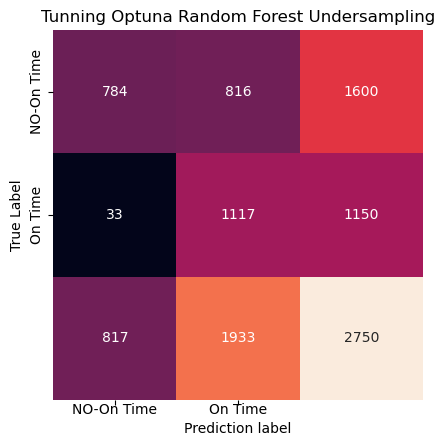

In [300]:
model_evaluation(rf_optuna.predict(X_test_data),"Tunning Optuna Random Forest Undersampling")

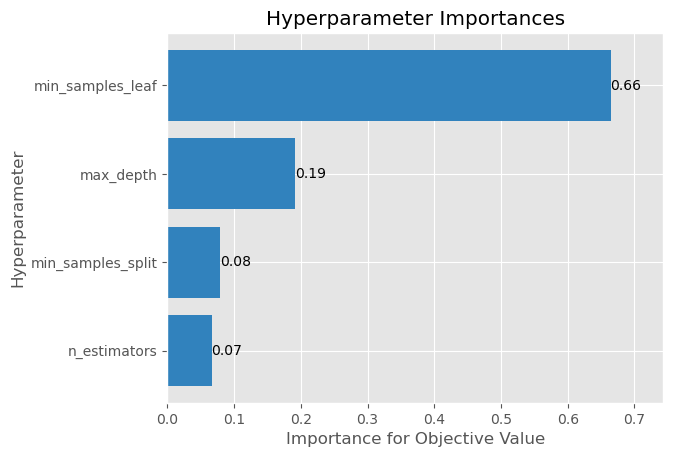

In [301]:
from optuna.visualization.matplotlib import plot_param_importances

plot_param_importances(study);

In [302]:
optuna.visualization.plot_optimization_history(study)

### Best Model : Tunning Optuna Random Forest (Undersampling)

In [291]:
rf_optuna.predict(X_test_data)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [292]:
predict_rf_optuna = pd.DataFrame(rf_optuna.predict(X_test_data), columns=['hasil_prediksi_pengiriman']) 
predict_rf_optuna

hasil_prediksi_pengiriman
0                             1
1                             1
2                             1
3                             1
4                             0
5                             0
6                             0
7                             0
8                             1
9                             1
10                            0
11                            1
12                            1
13                            1
14                            0
15                            1
16                            1
17                            1
18                            1
19                            1
20                            0
21                            1
22                            1
23                            0
24                            1
25                            0
26                            0
27                            0
28                            1
29                            1
30                            0
31                            1
32                            0
33                            1
34                            1
35                            1
36                            0
37                            1
38                            1
39                            0
40                            1
41                            0
42                            1
43                            1
44                            0
45                            1
46                            0
47                            1
48                            1
49                            1
50                            0
51                            1
52                            1
53                            0
54                            1
55                            1
56                            0
57                            0
58                            1
59                            1
60                            1
61                            1
62                            1
63                            1
64                            1
65                            0
66                            0
67                            1
68                            1
69                            1
70                            1
71                            1
72                            1
73                            0
74                            1
75                            0
76                            1
77                            0
78                            1
79                            1
80                            1
81                            1
82                            0
83                            0
84                            1
85                            1
86                            1
87                            0
88                            1
89                            1
90                            1
91                            1
92                            1
93                            1
94                            1
95                            1
96                            0
97                            1
98                            0
99                            1
100                           1
101                           0
102                           1
103                           1
104                           1
105                           1
106                           1
107                           0
108                           0
109                           0
110                           1
111                           1
112                           0
113                           1
114                           1
115                           0
116                           1
117                           1
118                           1
119                           1
120                           1
121                           1
122                           0
123                           1
124   

In [323]:
df_result_pred_optuna = pd.concat([x_test.reset_index(drop='True'),predict_rf_optuna.reset_index(drop='True')],axis=1)
df_result_pred_optuna.sample(3)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
1847  9326               F           Flight                    4   
2654  2563               D             Ship                    4   
2542  6983               C           Flight                    3   

      Customer_rating  Cost_of_the_Product  Prior_purchases  \
1847                1                  271                4   
2654                3                  191                3   
2542                3                  136                2   

     Product_importance Gender  Discount_offered  Weight_in_gms  \
1847             medium      F                 2           4133   
2654               high      F                45           3714   
2542             medium      M                10           5749   

      hasil_prediksi_pengiriman  
1847                          0  
2654                          1  
2542                          1

## Feature Importance

In [294]:
# let's create a dictionary of features importance values
feat_dict= {}
for col, val in sorted(zip(list(X_train_data), rf_optuna.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [295]:
feat_rf_optuna = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_rf_optuna

Feature  Importance
0             Discount_offered    0.389169
1                Weight_in_gms    0.342547
2          Cost_of_the_Product    0.102269
3              Prior_purchases    0.058317
4          Customer_care_calls    0.030573
5              Customer_rating    0.025497
6     percent_Mode_of_Shipment    0.015225
7   percent_Product_importance    0.014454
8      percent_Warehouse_block    0.009507
9                     Gender_M    0.006291
10                    Gender_F    0.006151

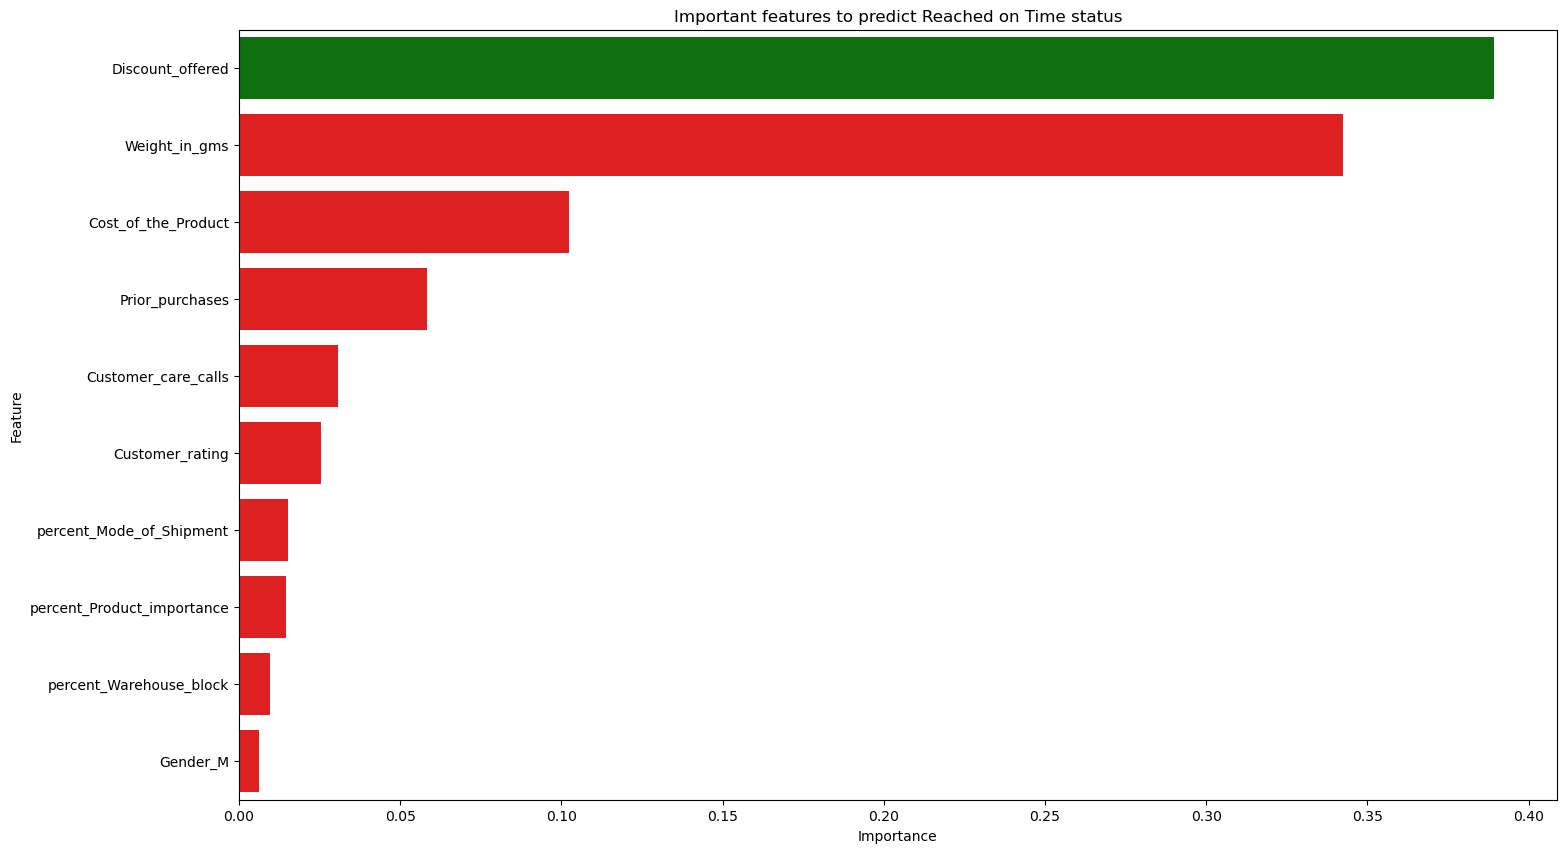

In [296]:
values = feat_rf_optuna.head(10).Importance    
idx = feat_rf_optuna.head(10).Feature
plt.figure(figsize=(17,10))
clrs = ['red' if (x < max(values)) else 'green' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict Reached on Time status')
plt.show()

## Dalex

In [297]:
# import dalex to explain complex model
import dalex as dx
## initiate explainer for the best model
var_exp = dx.Explainer(rf_optuna, X_train_data, y_train_data, label = "Random Forest Optuna Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8249 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8249 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Optuna Interpretation
  -> predict function  : <function yhat_proba_default at 0x0000029685DB6940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.473, max = 0.838
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.804, mean = -0.0743, max = 0.792
  -> model_info        : package sklearn

A new explainer has been created!


In [298]:
# visualize permutation feature importance for the best model
var_exp.model_parts().plot()

In [329]:
# create partial dependence plot of LogReg model
var_exp.model_profile().plot()

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 11/11 [00:40<00:00,  3.71s/it]


**Observasi**:

- `Cost_of_the_Product` semakin mahal barangnya semakin tepat pengirimannya
- `Weight_in_gms` rentang berat barang antara 4000 - 6000 tepat pengirimannya, selain itu tidak tepat. Tidak diketahui alasannya kenapa hanya barang dengan berat 4000 - 6000 saja yang tepat pengirimannya
- `Discount_offered` walaupun di posisi kedua paling berpengaruh. Tepat tidaknya pengiriman, diskon semakin tinggi semakin tidak tepat waktu

## Conclusion :

Dari observasi yang dilakukan, maka dapat disimpulkan bahwa model terbaik untuk memprediksi pengiriman produk disampaikan tepat waktu atau tidak adalah Model Hyperparameter Tuning using Optuna (Random Forest Undersampling), karena memiliki nilai Recall terbaik yaitu 97% serta nilai F1-score yaitu 72%. Walaupun nilai Precission jelek, tapi masih bisa dipertanggungjawabkan karena nilai Recallnya bagus.

## Recommendation :

1. Perbanyak pengiriman melalui layanan Flight (Penerbangan) dan Road (Jalan) untuk mengurangi keterlambatan pengiriman
2. Buat gudang blok F agar cepat dalam melakukan pengiriman, sehingga dapat mengurangi keterlambatan pengiriman atau pindahkan beberapa barang ke gudang blok lainnya.
3. Tingkatkan pengiriman agar tepat waktu sehingga rating 1-3 bisa naik menjadi 4-5. Karena, diberikan diskon lebih dari 10% pun tidak akan menaikkan rating. Walaupun, sudah ada rating 4-5. Tetapi, akan lebih baik jika semua ratingnya 4-5. 